In [1]:
import folium
import pandas as pd

In [2]:
DATA_PATH = "data"

In [6]:
df_card_1 = pd.read_csv(f"{DATA_PATH}/TOTAL_BC1_MM_CCND_CUST_CRTR_CCND_CSPT_SGG_MG.csv", encoding='cp949')
df_card_2 = pd.read_csv(f"{DATA_PATH}/TOTAL_BC1_MM_CCND_CUST_CRTR_CCND_EXCL_LC_CSPT_SGG_MG.csv", encoding='cp949')
df_card_3 = pd.read_csv(f"{DATA_PATH}/TOTAL_BC1_MM_CCND_EXCL_RSDT_CRTR_CCND_CSPT_SGG_MG.csv", encoding = 'cp949')
df_card_4 = pd.read_csv(f"{DATA_PATH}/TOTAL_BC1_MM_LC_CRTR_TOBIZ_SLS_SZ_MG.csv", encoding = 'cp949')

In [14]:
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')  # 맑은 고딕 폰트를 사용
plt.rcParams['axes.unicode_minus'] = False

충남 고객기준 충남 소비 현황(BC카드자료기준)

In [15]:
df_card_1

기준연월     시군구명   전체이용건수       전체이용금액
0    201901      계룡시    52835   1608962707
1    201901      공주시   161138   6820958298
2    201901      금산군    54561   2365397628
3    201901      논산시   209979   9132759474
4    201901      당진시   406899  15952303417
..      ...      ...      ...          ...
923  202310  천안시 동남구   766141  26958920481
924  202310  천안시 서북구  1230166  41226331503
925  202310      청양군    33583   2367998642
926  202310      태안군    76289   4218484261
927  202310      홍성군   191357   9745334718

[928 rows x 4 columns]

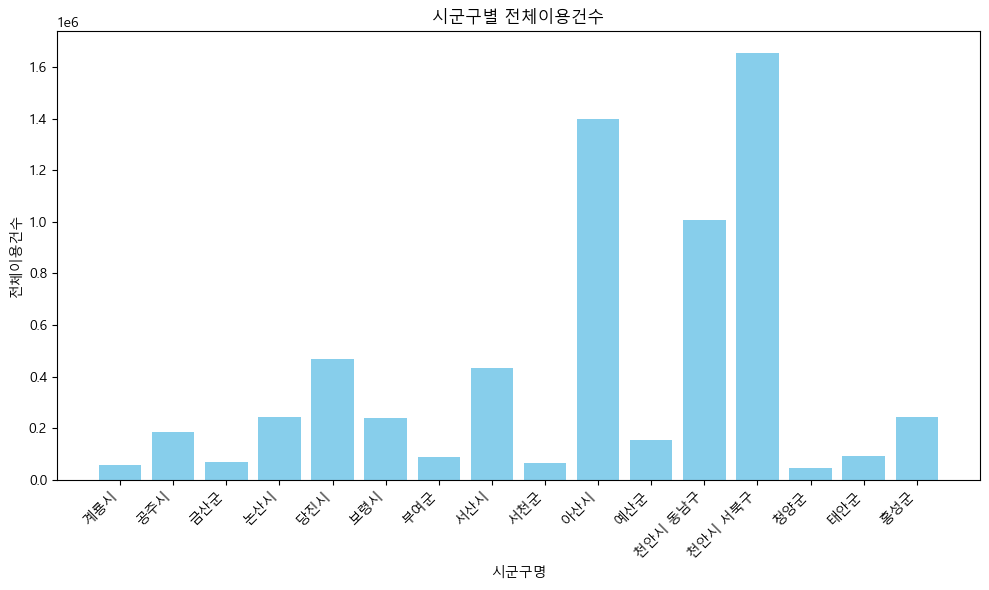

In [16]:
import matplotlib.pyplot as plt

# 시군구별 전체이용건수 시각화
plt.figure(figsize=(10, 6))
plt.bar(df_card_1['시군구명'], df_card_1['전체이용건수'], color='skyblue')
plt.xlabel('시군구명')
plt.ylabel('전체이용건수')
plt.title('시군구별 전체이용건수')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

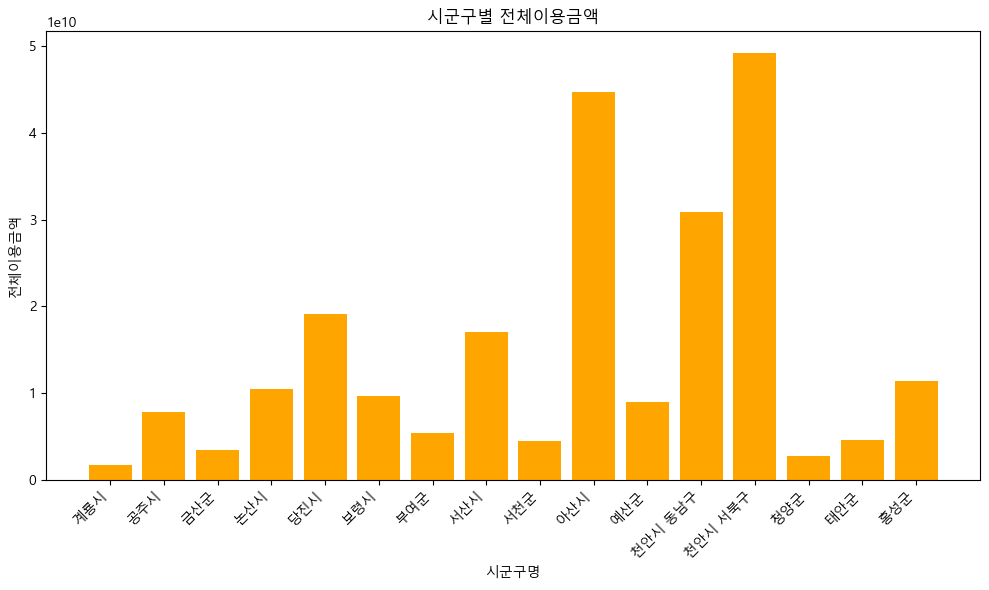

In [17]:
# 시군구별 전체이용금액 시각화
plt.figure(figsize=(10, 6))
plt.bar(df_card_1['시군구명'], df_card_1['전체이용금액'], color='orange')
plt.xlabel('시군구명')
plt.ylabel('전체이용금액')
plt.title('시군구별 전체이용금액')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

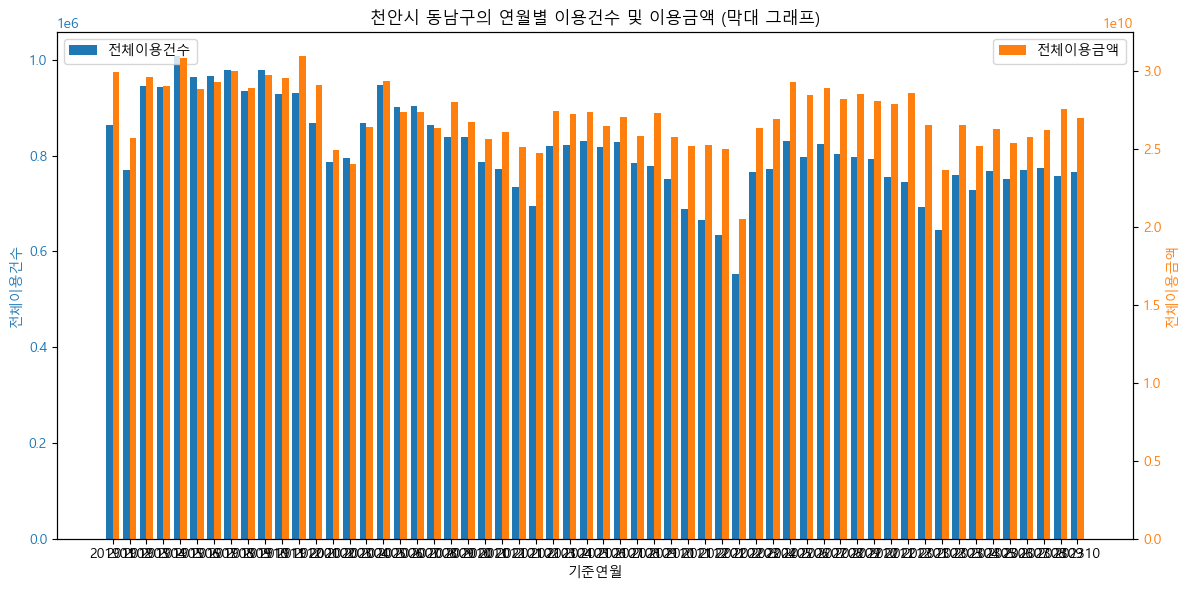

In [21]:
import numpy as np

region_name = '천안시 동남구'
df_region = df_card_1[df_card_1['시군구명'] == region_name]

# 연월별 이용건수 및 이용금액 시각화
fig, ax1 = plt.subplots(figsize=(12, 6))

# x축은 '기준연월'
x = np.arange(len(df_region['기준연월']))  # 위치를 설정하기 위해 numpy 배열 사용

# 첫 번째 y축 (이용건수) 막대 그래프
color = 'tab:blue'
ax1.set_xlabel('기준연월')
ax1.set_ylabel('전체이용건수', color=color)
bars1 = ax1.bar(x - 0.2, df_region['전체이용건수'], width=0.4, color=color, label='전체이용건수')
ax1.tick_params(axis='y', labelcolor=color)

# 두 번째 y축 (이용금액) 막대 그래프
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('전체이용금액', color=color)
bars2 = ax2.bar(x + 0.2, df_region['전체이용금액'], width=0.4, color=color, label='전체이용금액')
ax2.tick_params(axis='y', labelcolor=color)

# x축 레이블을 기준연월로 설정
ax1.set_xticks(x)
ax1.set_xticklabels(df_region['기준연월'])

# 그래프 제목 및 레이아웃 설정
plt.title(f'{region_name}의 연월별 이용건수 및 이용금액 (막대 그래프)')
fig.tight_layout()

# 범례 추가
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_17112\4011053731.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['기준연월'] = df_region['기준연월'].astype(str)
C:\Users\admin\AppData\Local\Temp\ipykernel_17112\4011053731.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['년도'] = df_region['기준연월'].str[:4]


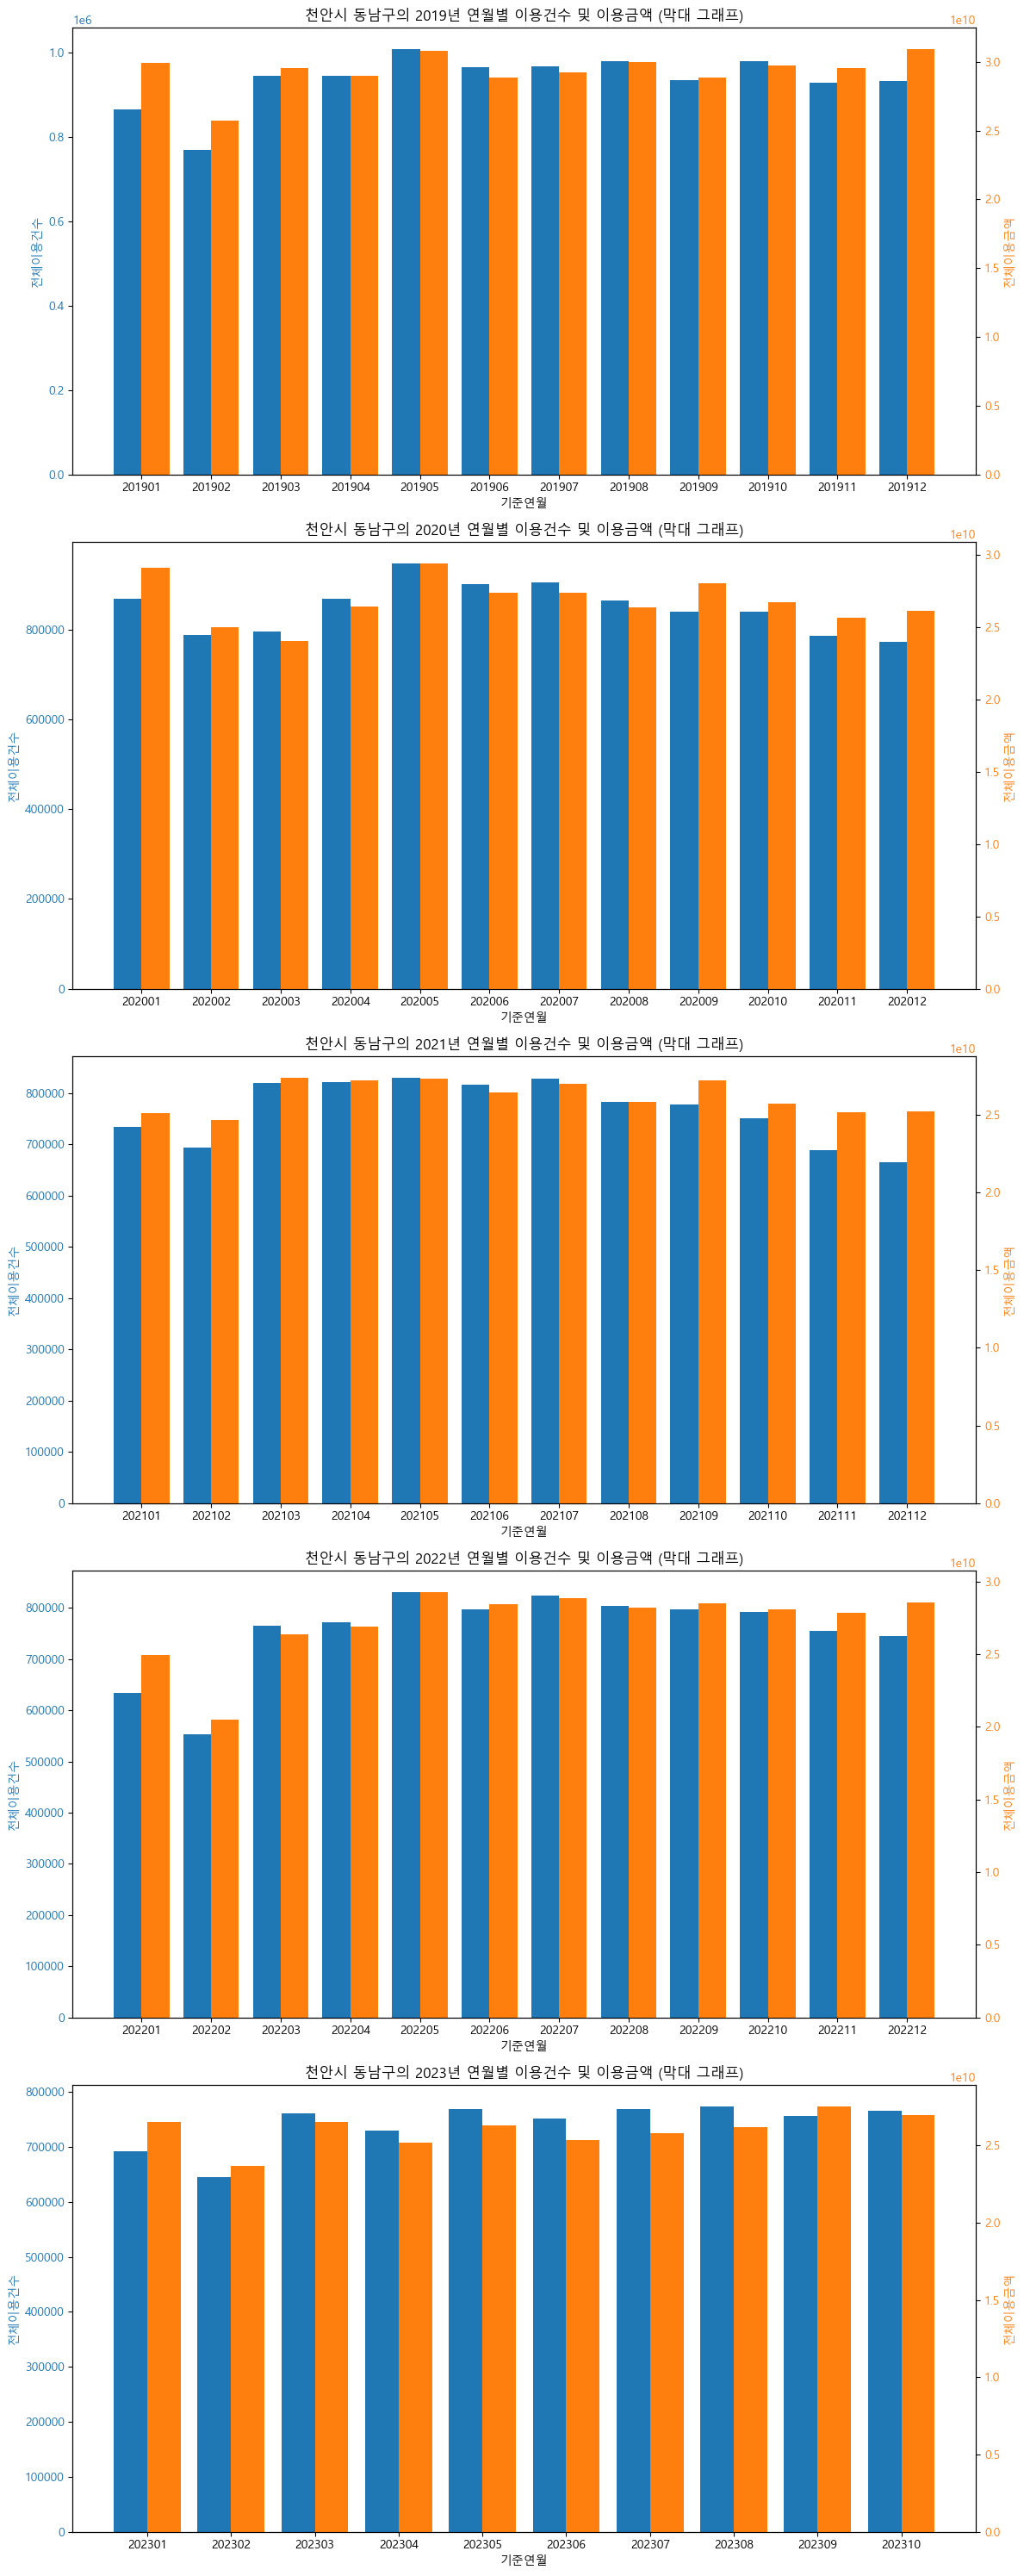

In [25]:
region_name = '천안시 동남구'
df_region = df_card_1[df_card_1['시군구명'] == region_name]

# '기준연월'을 문자열로 변환
df_region['기준연월'] = df_region['기준연월'].astype(str)

# '기준연월'에서 연도를 추출하여 '년도' 컬럼 생성
df_region['년도'] = df_region['기준연월'].str[:4]

# 연도 리스트
years = ['2019', '2020', '2021', '2022', '2023']

# 연도별 시각화
fig, axs = plt.subplots(len(years), 1, figsize=(12, len(years) * 6))

for i, year in enumerate(years):
    df_year = df_region[df_region['년도'] == year]
    x = np.arange(len(df_year['기준연월']))
    
    # 첫 번째 y축 (이용건수) 막대 그래프
    color = 'tab:blue'
    axs[i].set_xlabel('기준연월')
    axs[i].set_ylabel('전체이용건수', color=color)
    bars1 = axs[i].bar(x - 0.2, df_year['전체이용건수'], width=0.4, color=color, label='전체이용건수')
    axs[i].tick_params(axis='y', labelcolor=color)
    
    # 두 번째 y축 (이용금액) 막대 그래프
    ax2 = axs[i].twinx()
    color = 'tab:orange'
    ax2.set_ylabel('전체이용금액', color=color)
    bars2 = ax2.bar(x + 0.2, df_year['전체이용금액'], width=0.4, color=color, label='전체이용금액')
    ax2.tick_params(axis='y', labelcolor=color)
    
    # x축 레이블을 기준연월로 설정
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(df_year['기준연월'])
    
    # 그래프 제목 및 레이아웃 설정
    axs[i].set_title(f'{region_name}의 {year}년 연월별 이용건수 및 이용금액 (막대 그래프)')
    fig.tight_layout()

plt.show()

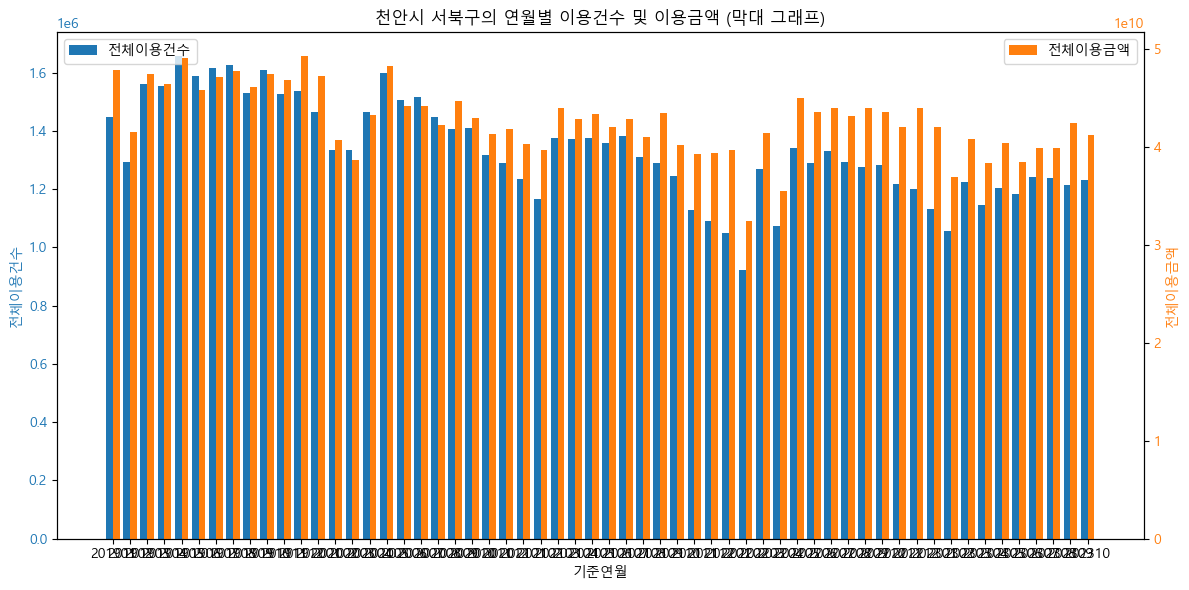

In [22]:
region_name = '천안시 서북구'
df_region = df_card_1[df_card_1['시군구명'] == region_name]

# 연월별 이용건수 및 이용금액 시각화
fig, ax1 = plt.subplots(figsize=(12, 6))

# x축은 '기준연월'
x = np.arange(len(df_region['기준연월']))  # 위치를 설정하기 위해 numpy 배열 사용

# 첫 번째 y축 (이용건수) 막대 그래프
color = 'tab:blue'
ax1.set_xlabel('기준연월')
ax1.set_ylabel('전체이용건수', color=color)
bars1 = ax1.bar(x - 0.2, df_region['전체이용건수'], width=0.4, color=color, label='전체이용건수')
ax1.tick_params(axis='y', labelcolor=color)

# 두 번째 y축 (이용금액) 막대 그래프
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('전체이용금액', color=color)
bars2 = ax2.bar(x + 0.2, df_region['전체이용금액'], width=0.4, color=color, label='전체이용금액')
ax2.tick_params(axis='y', labelcolor=color)

# x축 레이블을 기준연월로 설정
ax1.set_xticks(x)
ax1.set_xticklabels(df_region['기준연월'])

# 그래프 제목 및 레이아웃 설정
plt.title(f'{region_name}의 연월별 이용건수 및 이용금액 (막대 그래프)')
fig.tight_layout()

# 범례 추가
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_17112\3585607473.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['기준연월'] = df_region['기준연월'].astype(str)
C:\Users\admin\AppData\Local\Temp\ipykernel_17112\3585607473.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['년도'] = df_region['기준연월'].str[:4]


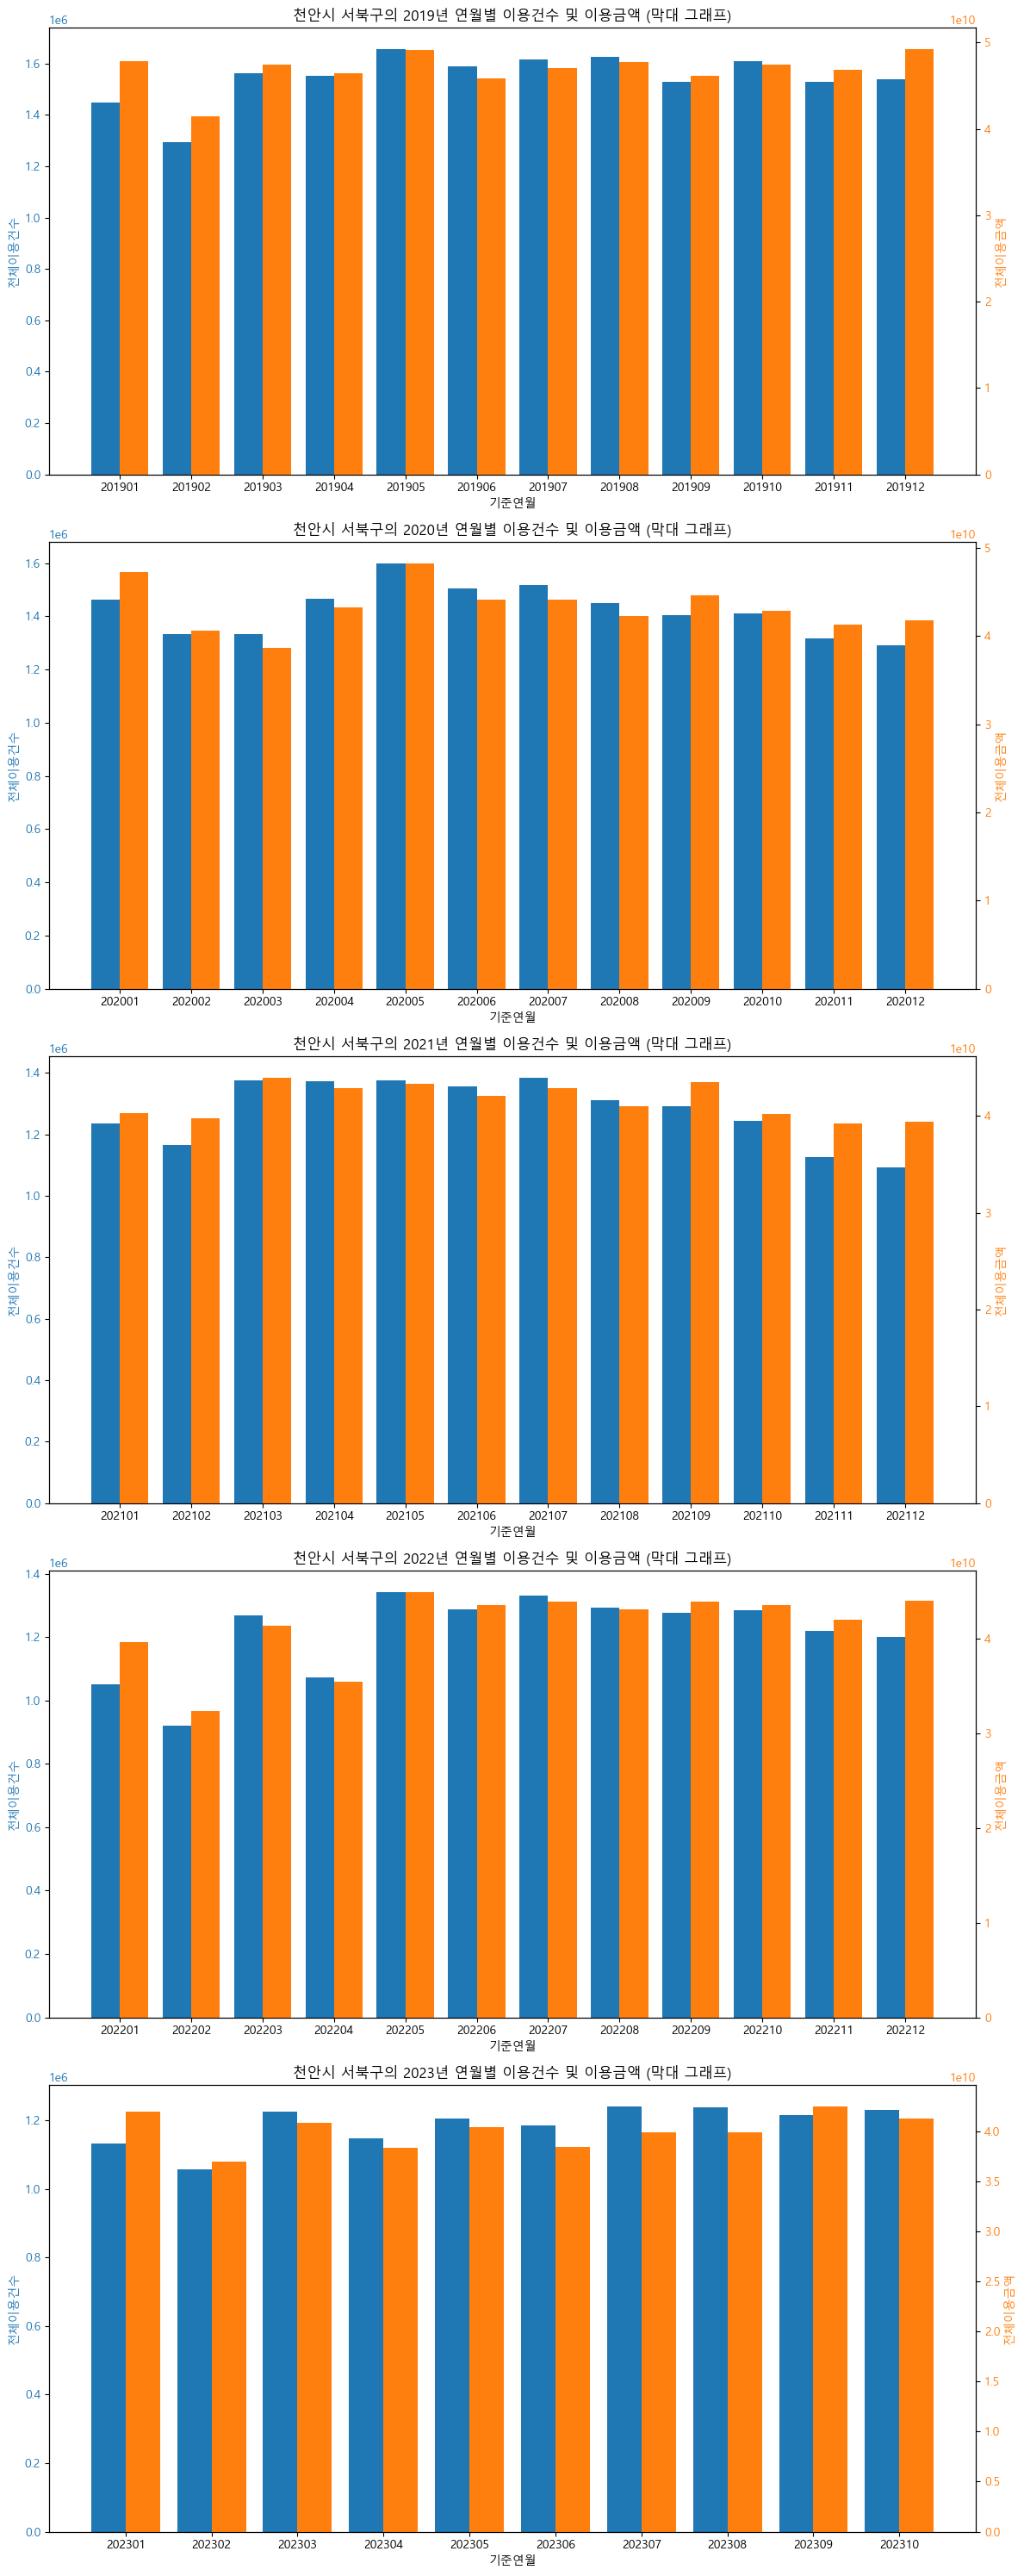

In [24]:
region_name = '천안시 서북구'
df_region = df_card_1[df_card_1['시군구명'] == region_name]

# '기준연월'을 문자열로 변환
df_region['기준연월'] = df_region['기준연월'].astype(str)

# '기준연월'에서 연도를 추출하여 '년도' 컬럼 생성
df_region['년도'] = df_region['기준연월'].str[:4]

# 연도 리스트
years = ['2019', '2020', '2021', '2022', '2023']

# 연도별 시각화
fig, axs = plt.subplots(len(years), 1, figsize=(12, len(years) * 6))

for i, year in enumerate(years):
    df_year = df_region[df_region['년도'] == year]
    x = np.arange(len(df_year['기준연월']))
    
    # 첫 번째 y축 (이용건수) 막대 그래프
    color = 'tab:blue'
    axs[i].set_xlabel('기준연월')
    axs[i].set_ylabel('전체이용건수', color=color)
    bars1 = axs[i].bar(x - 0.2, df_year['전체이용건수'], width=0.4, color=color, label='전체이용건수')
    axs[i].tick_params(axis='y', labelcolor=color)
    
    # 두 번째 y축 (이용금액) 막대 그래프
    ax2 = axs[i].twinx()
    color = 'tab:orange'
    ax2.set_ylabel('전체이용금액', color=color)
    bars2 = ax2.bar(x + 0.2, df_year['전체이용금액'], width=0.4, color=color, label='전체이용금액')
    ax2.tick_params(axis='y', labelcolor=color)
    
    # x축 레이블을 기준연월로 설정
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(df_year['기준연월'])
    
    # 그래프 제목 및 레이아웃 설정
    axs[i].set_title(f'{region_name}의 {year}년 연월별 이용건수 및 이용금액 (막대 그래프)')
    fig.tight_layout()

plt.show()

충남 고객기준 충남외 소비 현황(BC카드자료기준)

In [8]:
df_card_2

기준연월 시군구명  가맹점시군구명  전체이용건수    전체이용금액
0       201901  계룡시      가평군      40   1458380
1       201901  계룡시      강서구     581  45162061
2       201901  계룡시      경산시      95   4489838
3       201901  계룡시      구로구    1920  74014538
4       201901  계룡시      군산시     222   6897790
...        ...  ...      ...     ...       ...
182585  202310  홍성군  청주시 흥덕구     277   8477880
182586  202310  홍성군   포항시 남구      22    744570
182587  202310  홍성군      함안군      62   5684833
182588  202310  홍성군      함양군      32   1412710
182589  202310  홍성군      함평군      61   2312049

[182590 rows x 5 columns]

충남외 고객기준 충남 소비 현황(BC카드자료기준)

In [9]:
df_card_3

기준연월 고객광역시군구명   전체이용건수       전체이용금액
0    201901  세종특별자치시    85264   3098865139
1    201901    울산광역시    27791    991509656
2    201901    인천광역시   164820   5082848771
3    201901     전라북도   117489   3624541132
4    201901     충청북도   111399   3632282615
..      ...      ...      ...          ...
923  202309     경상남도    91351   2693089015
924  202309    광주광역시    48221   1437717086
925  202309    대전광역시   254604   8962126502
926  202310      경기도  1305701  41942230752
927  202310     경상북도    72905   2247602836

[928 rows x 4 columns]

In [27]:
# 고객광역시군구명별로 그룹화
grouped = df_card_3.groupby('고객광역시군구명').sum().reset_index()
grouped

고객광역시군구명      기준연월    전체이용건수         전체이용금액
0       강원도  10912533   1649522    45605299912
1   강원특별자치도    809234    133032     3665346310
2       경기도  11721767  67557143  2064439150203
3      경상남도  11721767   5082728   150305621706
4      경상북도  11721767   4057101   122875737094
5     광주광역시  11721767   2612434    77578604602
6     대구광역시  11721767   3607851   109258152248
7     대전광역시  11721767  14203738   495251308513
8     부산광역시  11721767   4758602   148938055310
9     서울특별시  11721767  36286310  1203494114139
10  세종특별자치시  11721767   4587670   169365172725
11    울산광역시  11721767   1709708    52777052710
12    인천광역시  11721767  11693831   345072727822
13     전라남도  11721767   2927303    93653610074
14     전라북도  11721767   6528336   212853253780
15  제주특별자치도  11721767    575881    15860993458
16     충청북도  11721767   6510089   214963264944

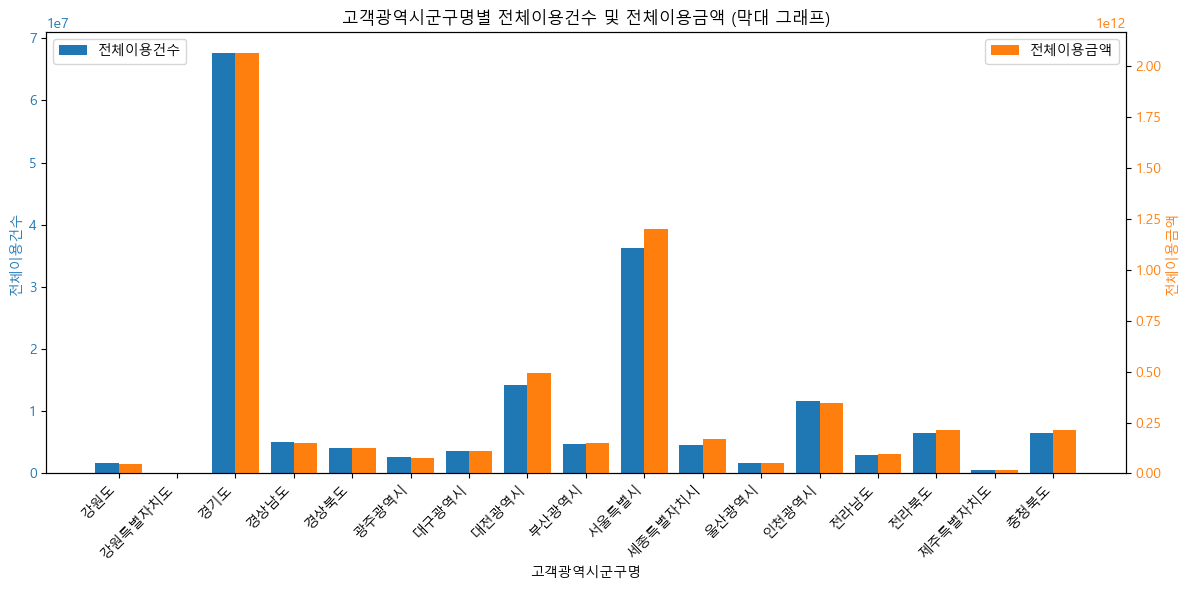

In [28]:
# 막대 그래프 시각화
fig, ax1 = plt.subplots(figsize=(12, 6))

# x축 설정
x = np.arange(len(grouped['고객광역시군구명']))

# 첫 번째 y축 (전체이용건수) 막대 그래프
color = 'tab:blue'
ax1.set_xlabel('고객광역시군구명')
ax1.set_ylabel('전체이용건수', color=color)
bars1 = ax1.bar(x - 0.2, grouped['전체이용건수'], width=0.4, color=color, label='전체이용건수')
ax1.tick_params(axis='y', labelcolor=color)

# 두 번째 y축 (전체이용금액) 막대 그래프
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('전체이용금액', color=color)
bars2 = ax2.bar(x + 0.2, grouped['전체이용금액'], width=0.4, color=color, label='전체이용금액')
ax2.tick_params(axis='y', labelcolor=color)

# x축 레이블 설정
ax1.set_xticks(x)
ax1.set_xticklabels(grouped['고객광역시군구명'], rotation=45, ha='right')

# 그래프 제목 및 레이아웃 설정
plt.title('고객광역시군구명별 전체이용건수 및 전체이용금액 (막대 그래프)')
fig.tight_layout()

# 범례 추가
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

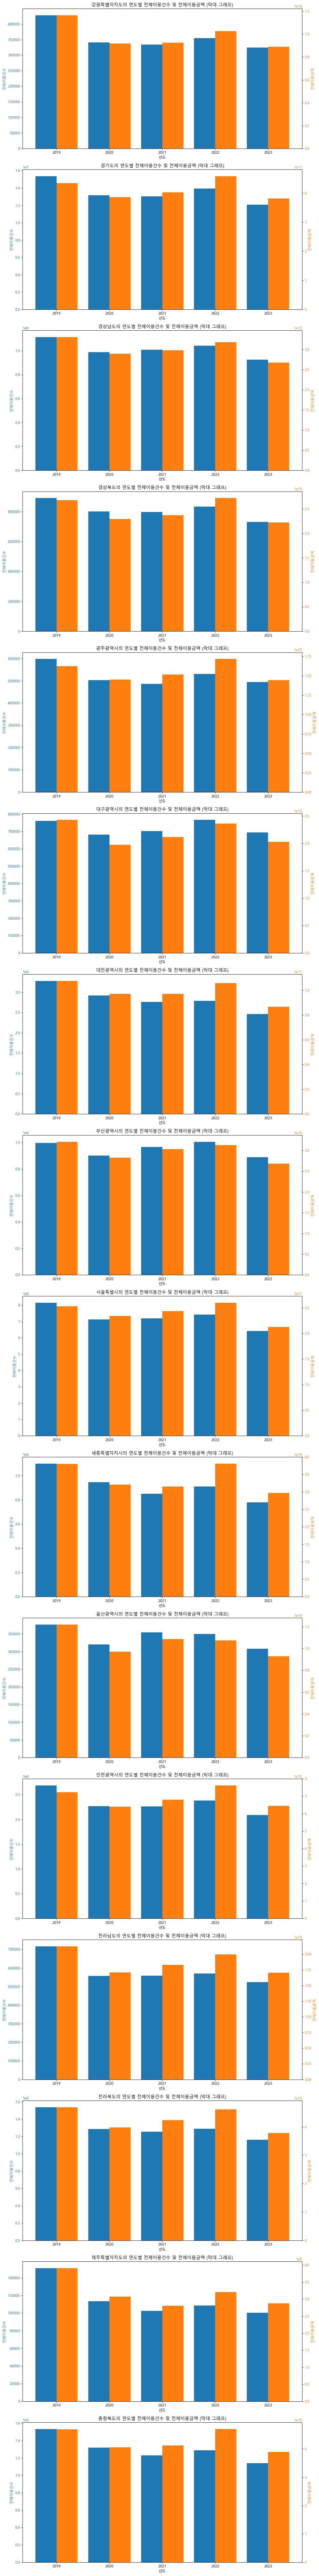

In [33]:
# '기준연월'을 문자열로 변환
df_card_3['기준연월'] = df_card_3['기준연월'].astype(str)

# '기준연월'에서 연도 추출
df_card_3['년도'] = df_card_3['기준연월'].str[:4]

# '강원도'와 '강원특별자치도'를 동일한 이름으로 통일 (예: '강원도')
df_card_3['고객광역시군구명'] = df_card_3['고객광역시군구명'].replace({'강원도': '강원특별자치도'})

# 연도와 고객광역시군구명별로 데이터 그룹화
grouped = df_card_3.groupby(['년도', '고객광역시군구명']).sum().reset_index()

# 모든 고객광역시군구명에 대해 반복하면서 시각화
unique_regions = grouped['고객광역시군구명'].unique()
num_regions = len(unique_regions)

# 전체 그래프 설정
fig, axs = plt.subplots(num_regions, 1, figsize=(12, num_regions * 6))

for i, region_name in enumerate(unique_regions):
    df_region = grouped[grouped['고객광역시군구명'] == region_name]

    # x축 설정
    x = np.arange(len(df_region['년도']))

    # 첫 번째 y축 (전체이용건수) 막대 그래프
    color = 'tab:blue'
    axs[i].set_xlabel('년도')
    axs[i].set_ylabel('전체이용건수', color=color)
    bars1 = axs[i].bar(x - 0.2, df_region['전체이용건수'], width=0.4, color=color, label='전체이용건수')
    axs[i].tick_params(axis='y', labelcolor=color)

    # 두 번째 y축 (전체이용금액) 막대 그래프
    ax2 = axs[i].twinx()
    color = 'tab:orange'
    ax2.set_ylabel('전체이용금액', color=color)
    bars2 = ax2.bar(x + 0.2, df_region['전체이용금액'], width=0.4, color=color, label='전체이용금액')
    ax2.tick_params(axis='y', labelcolor=color)

    # x축 레이블 설정
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(df_region['년도'])

    # 그래프 제목 및 레이아웃 설정
    axs[i].set_title(f'{region_name}의 연도별 전체이용건수 및 전체이용금액 (막대 그래프)')

fig.tight_layout()
plt.show()

충남 월별 카드 소비 현황(BC카드자료기준)

In [10]:
df_card_4

기준연월     시군구명     이용건수         이용금액
0    201901      계룡시    88154   2454073581
1    201901      금산군   145903   5210100942
2    201901      논산시   326570  13967662468
3    201901      당진시   636183  24238366473
4    201901      보령시   306387  12343364569
..      ...      ...      ...          ...
923  202310      예산군   284680  11945709414
924  202310  천안시 동남구  1224281  43713580942
925  202310  천안시 서북구  1670199  59921438247
926  202310      청양군    51999   2795141920
927  202310      홍성군   293444  12893067341

[928 rows x 4 columns]

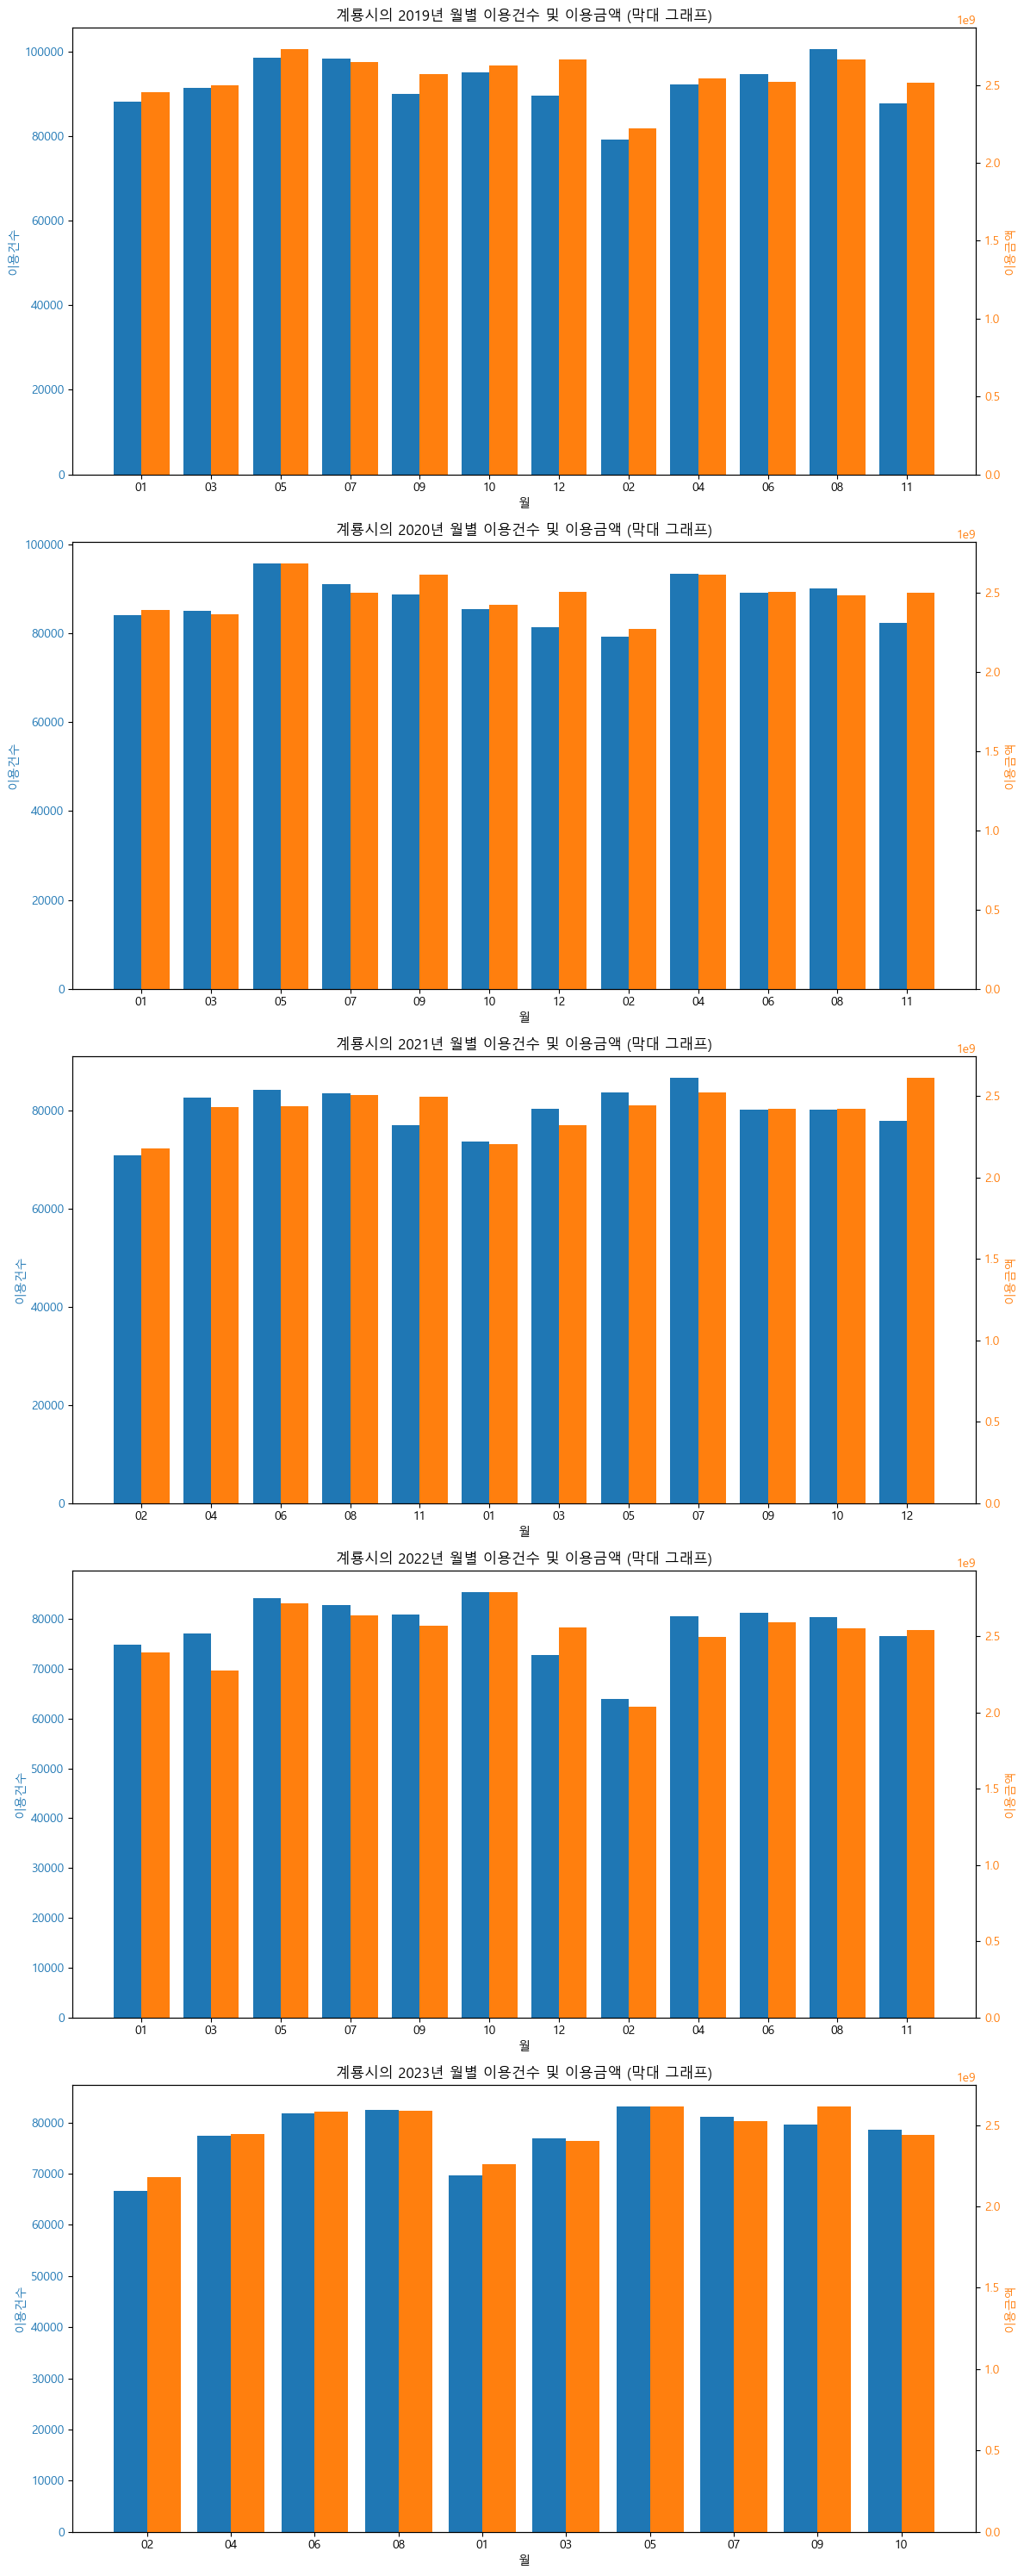

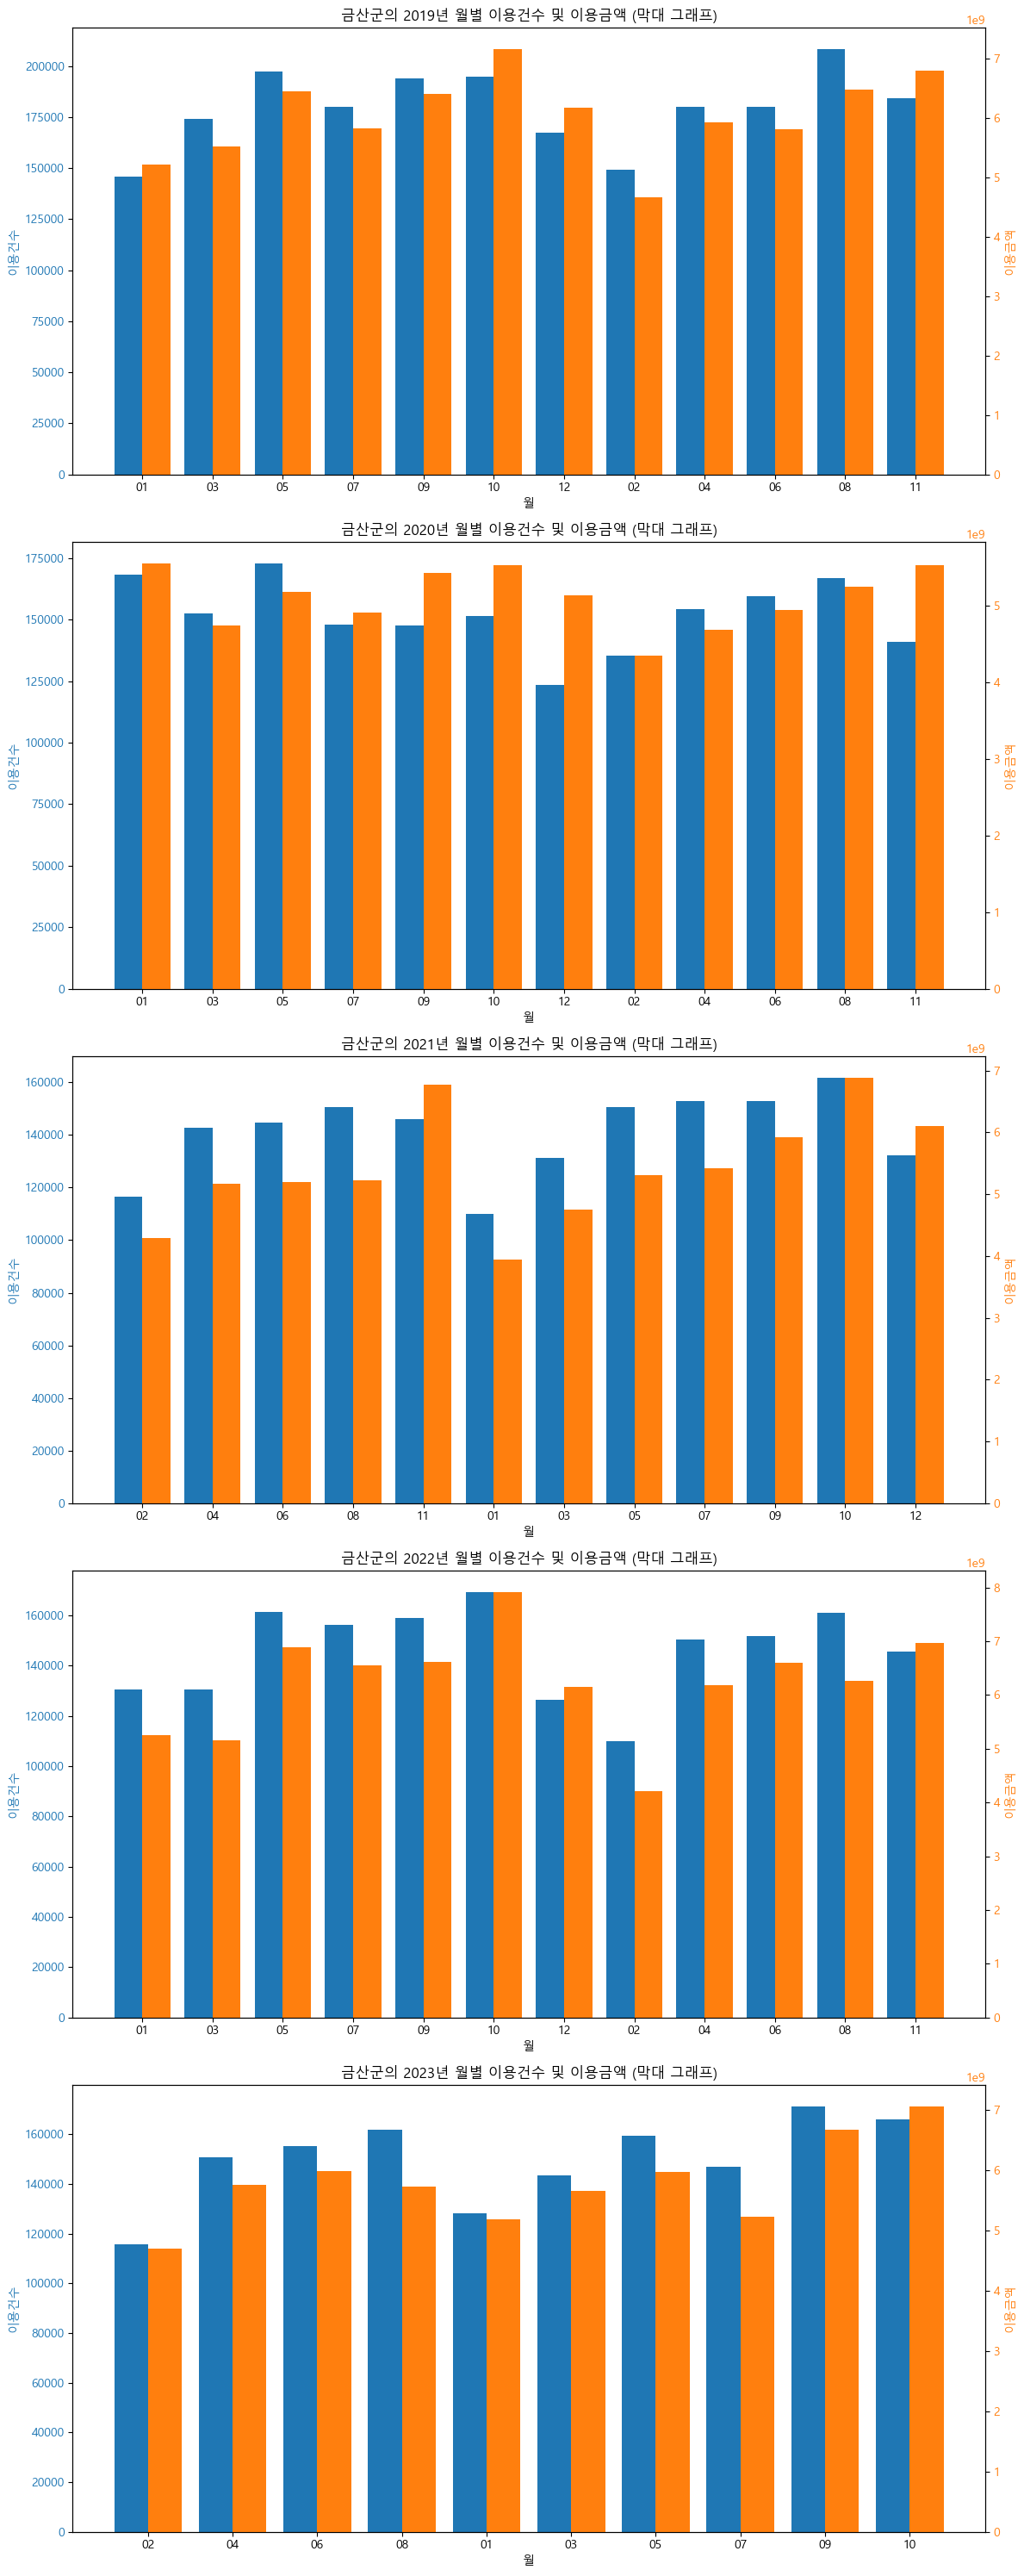

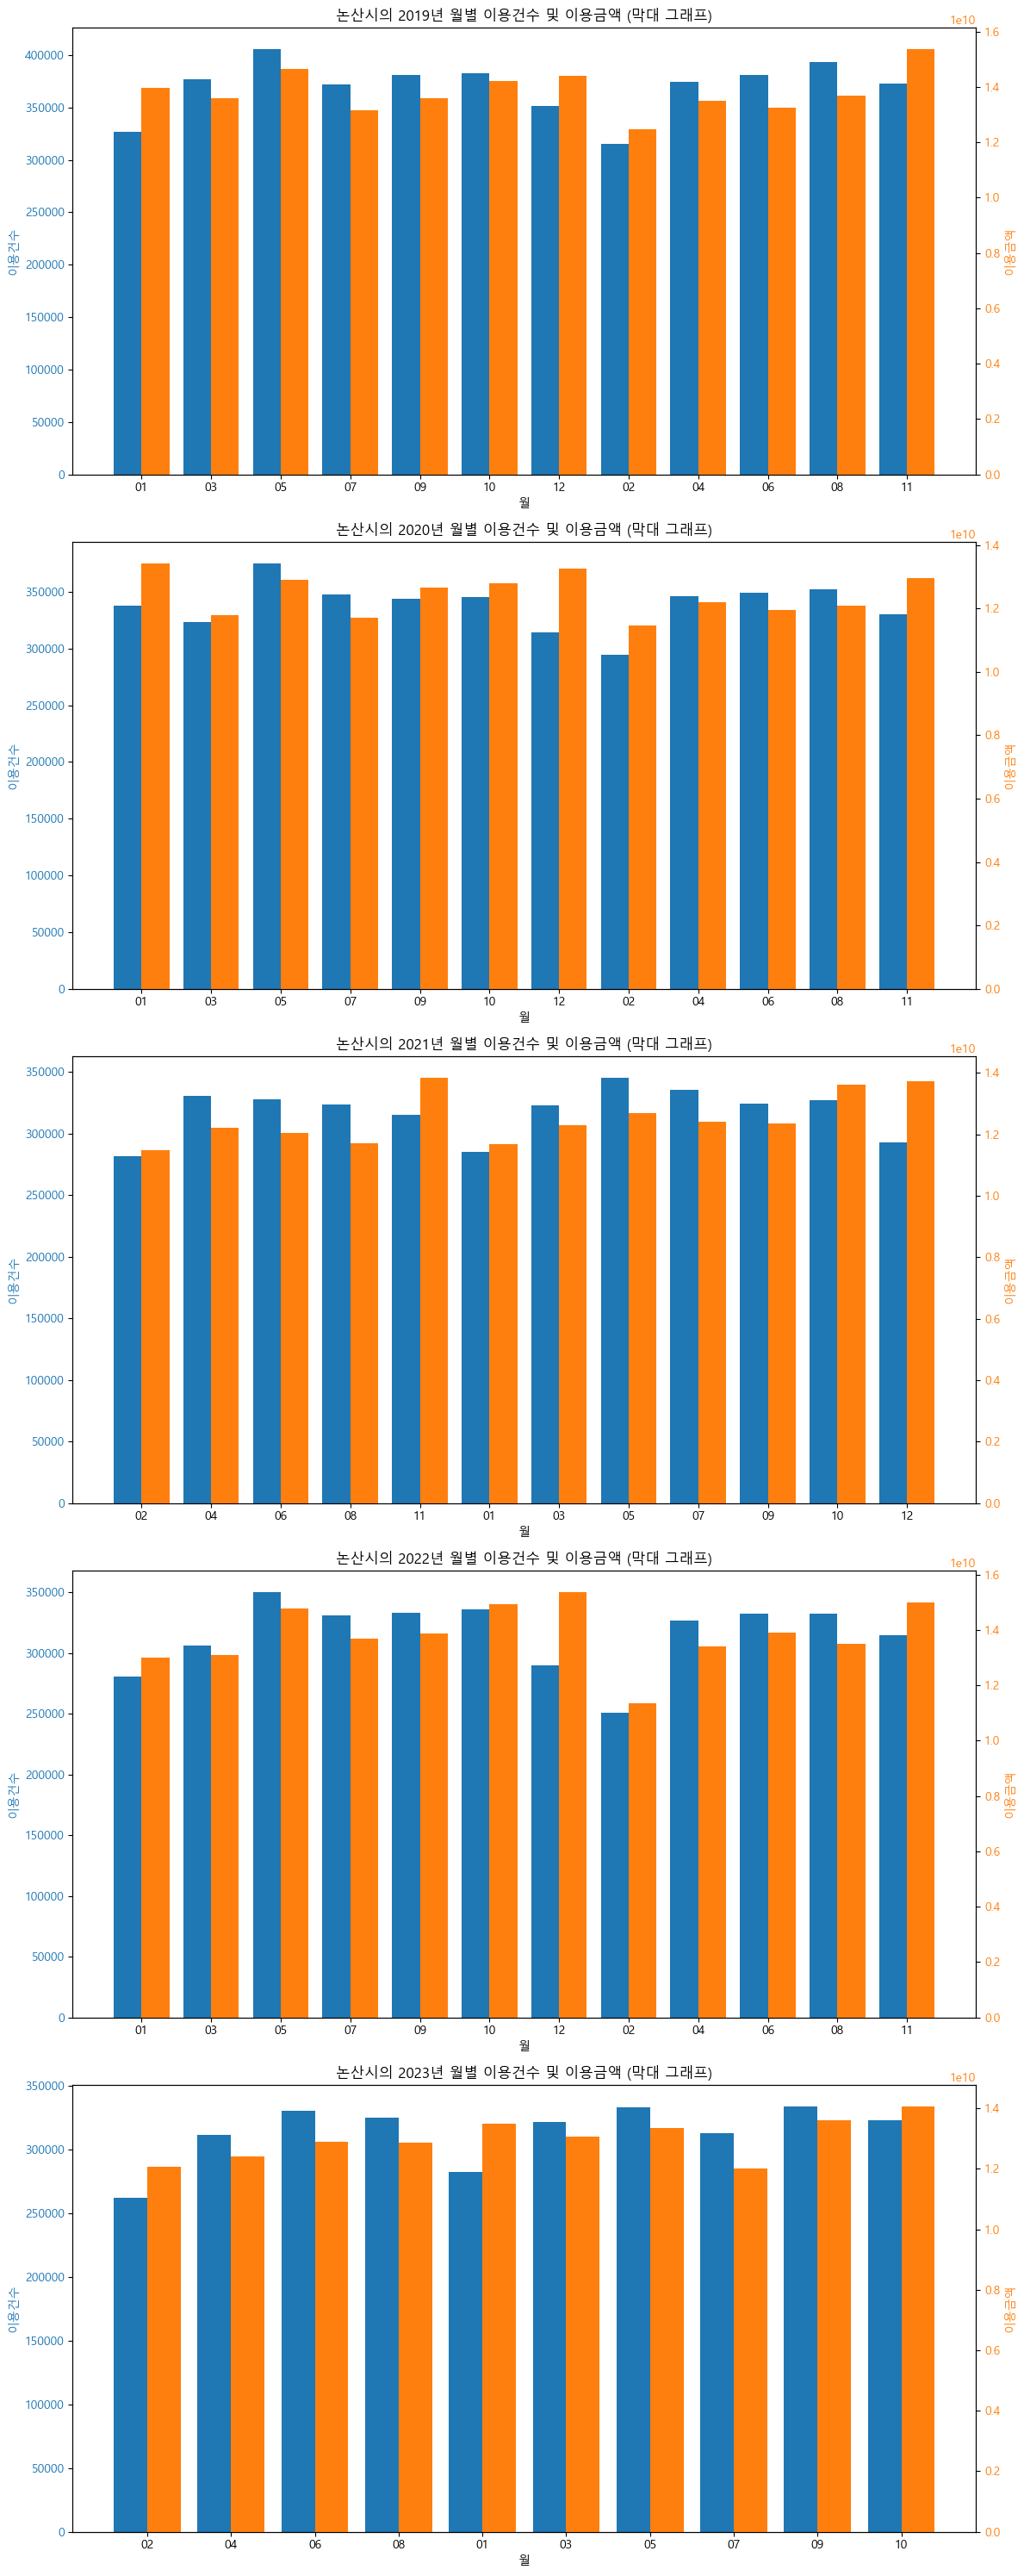

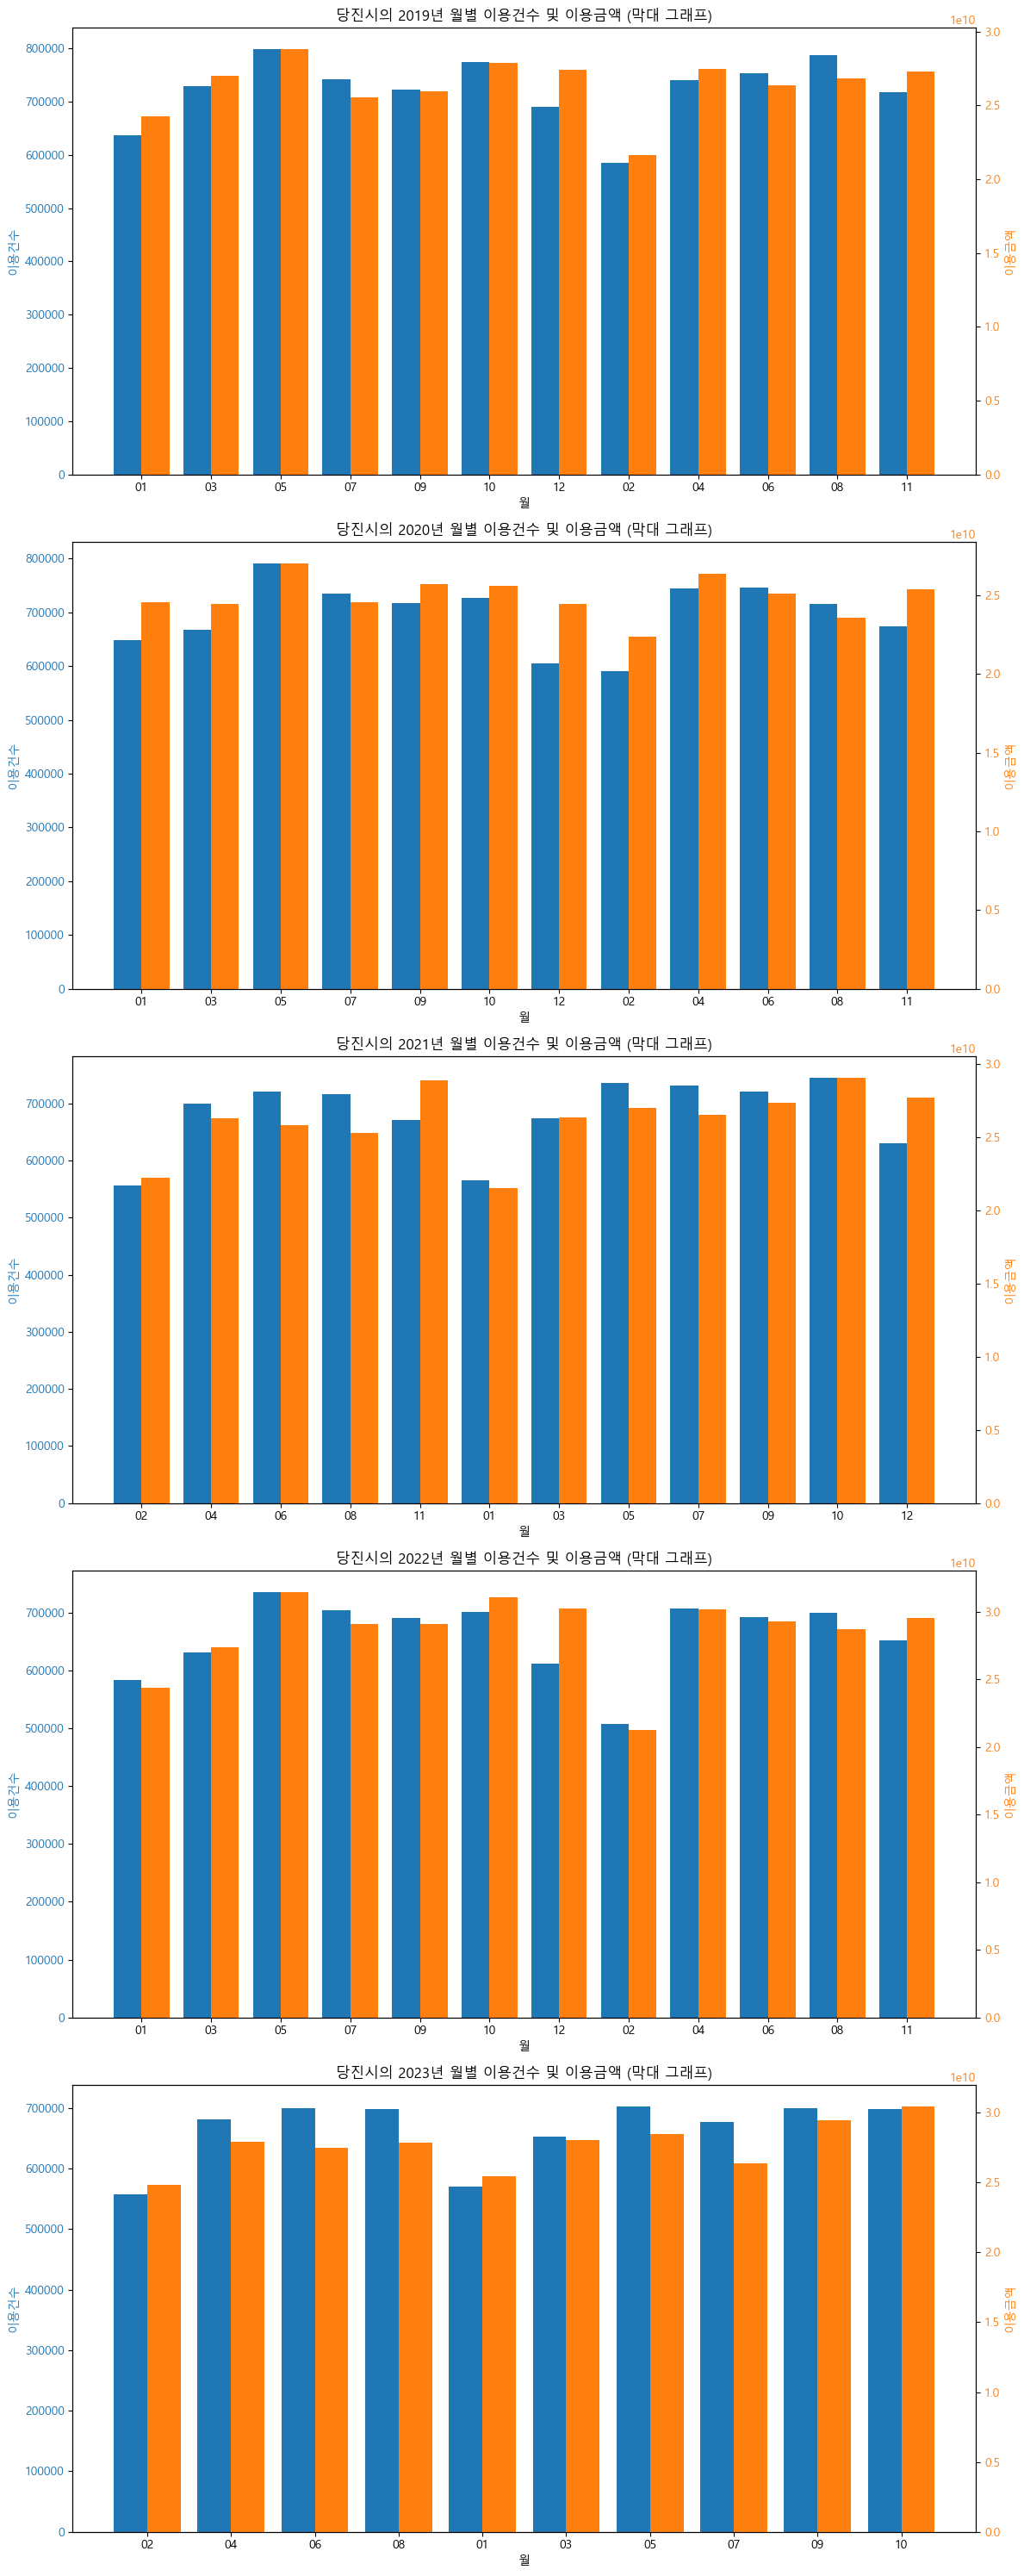

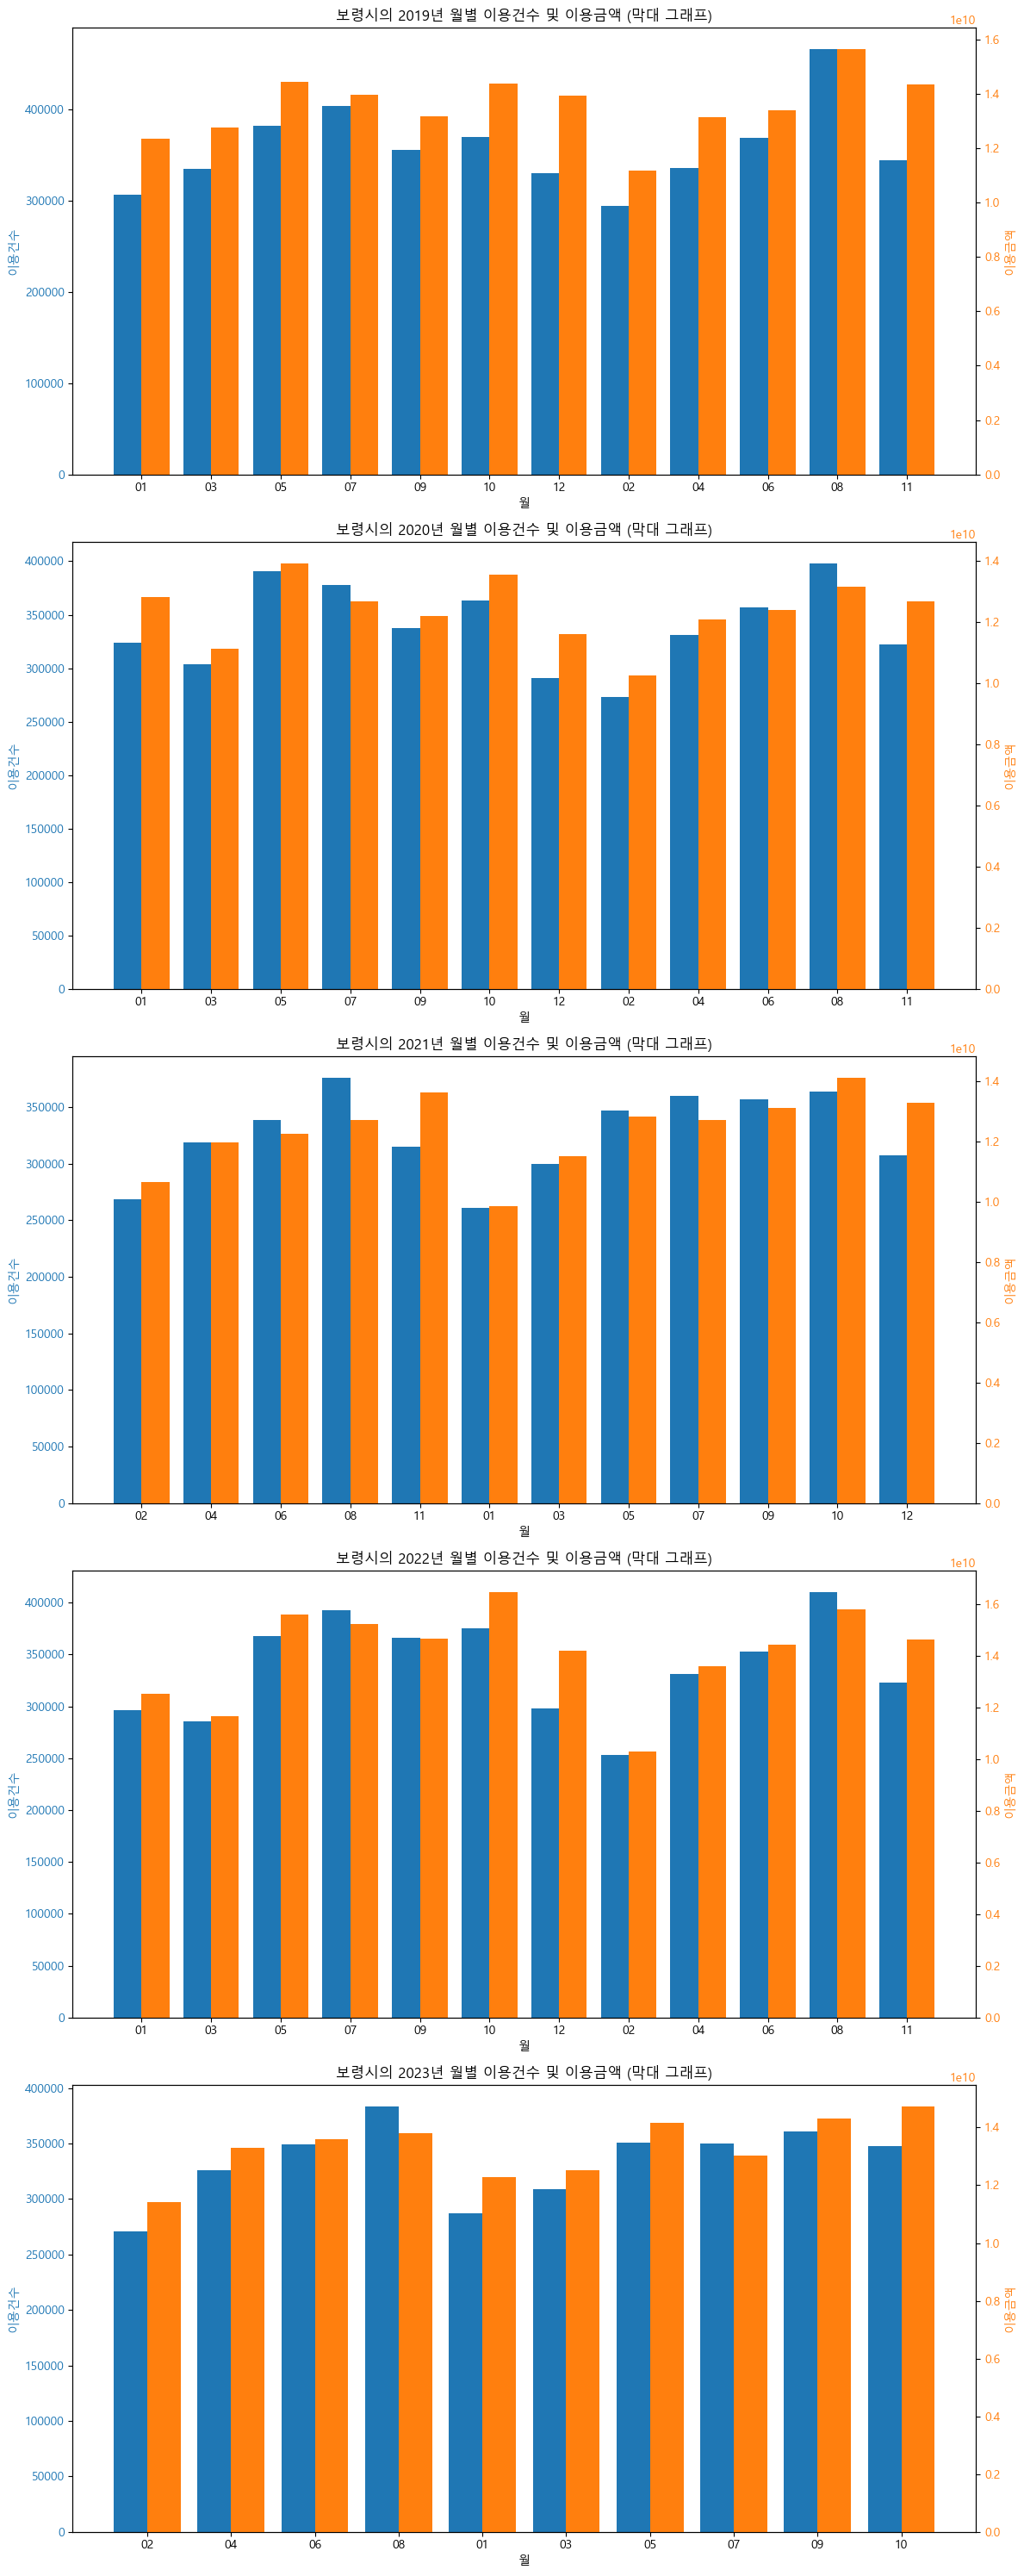

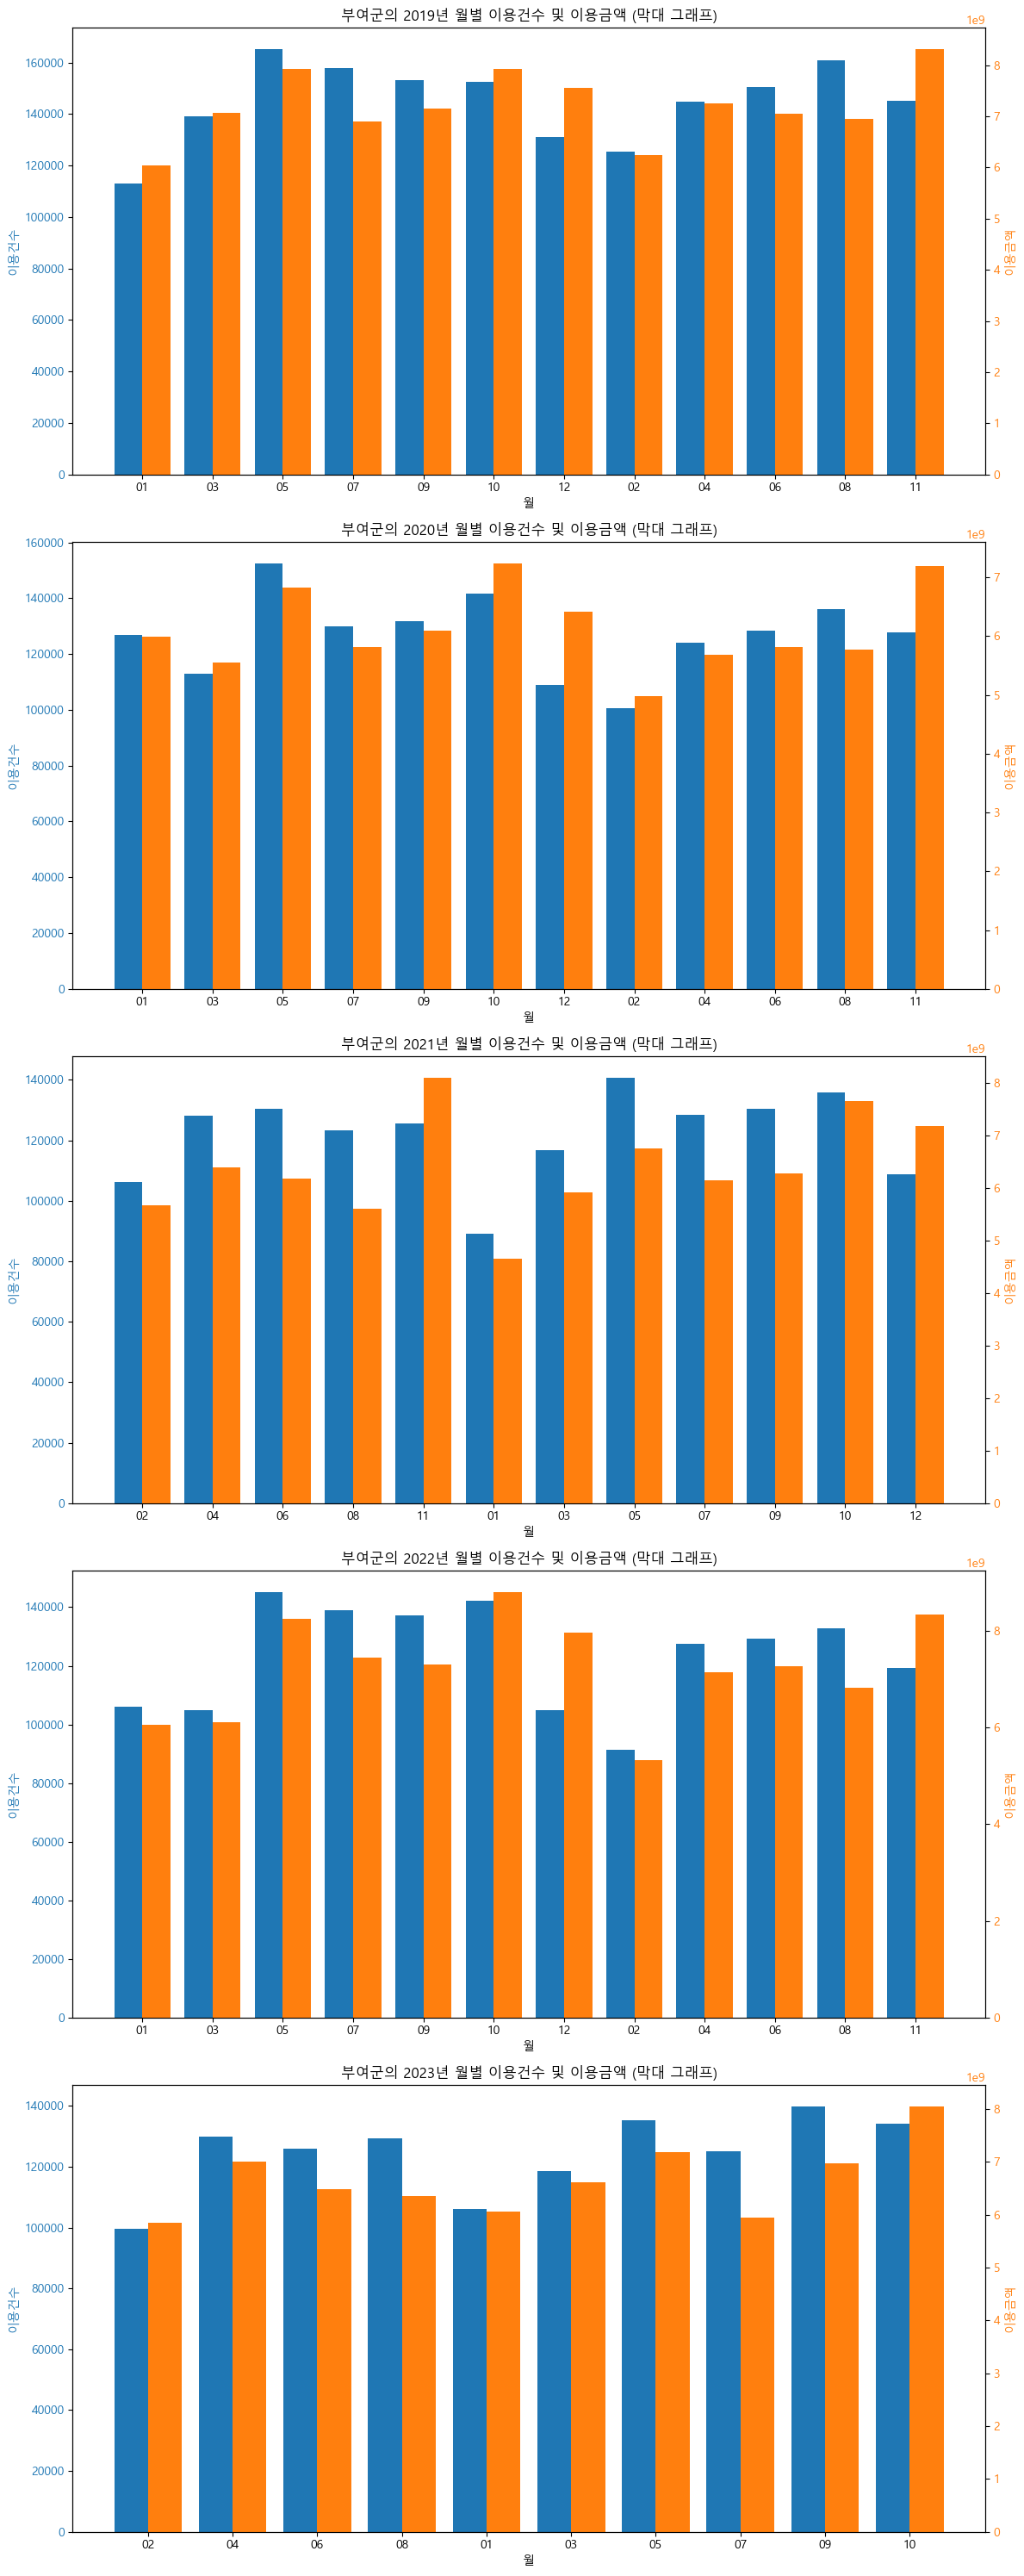

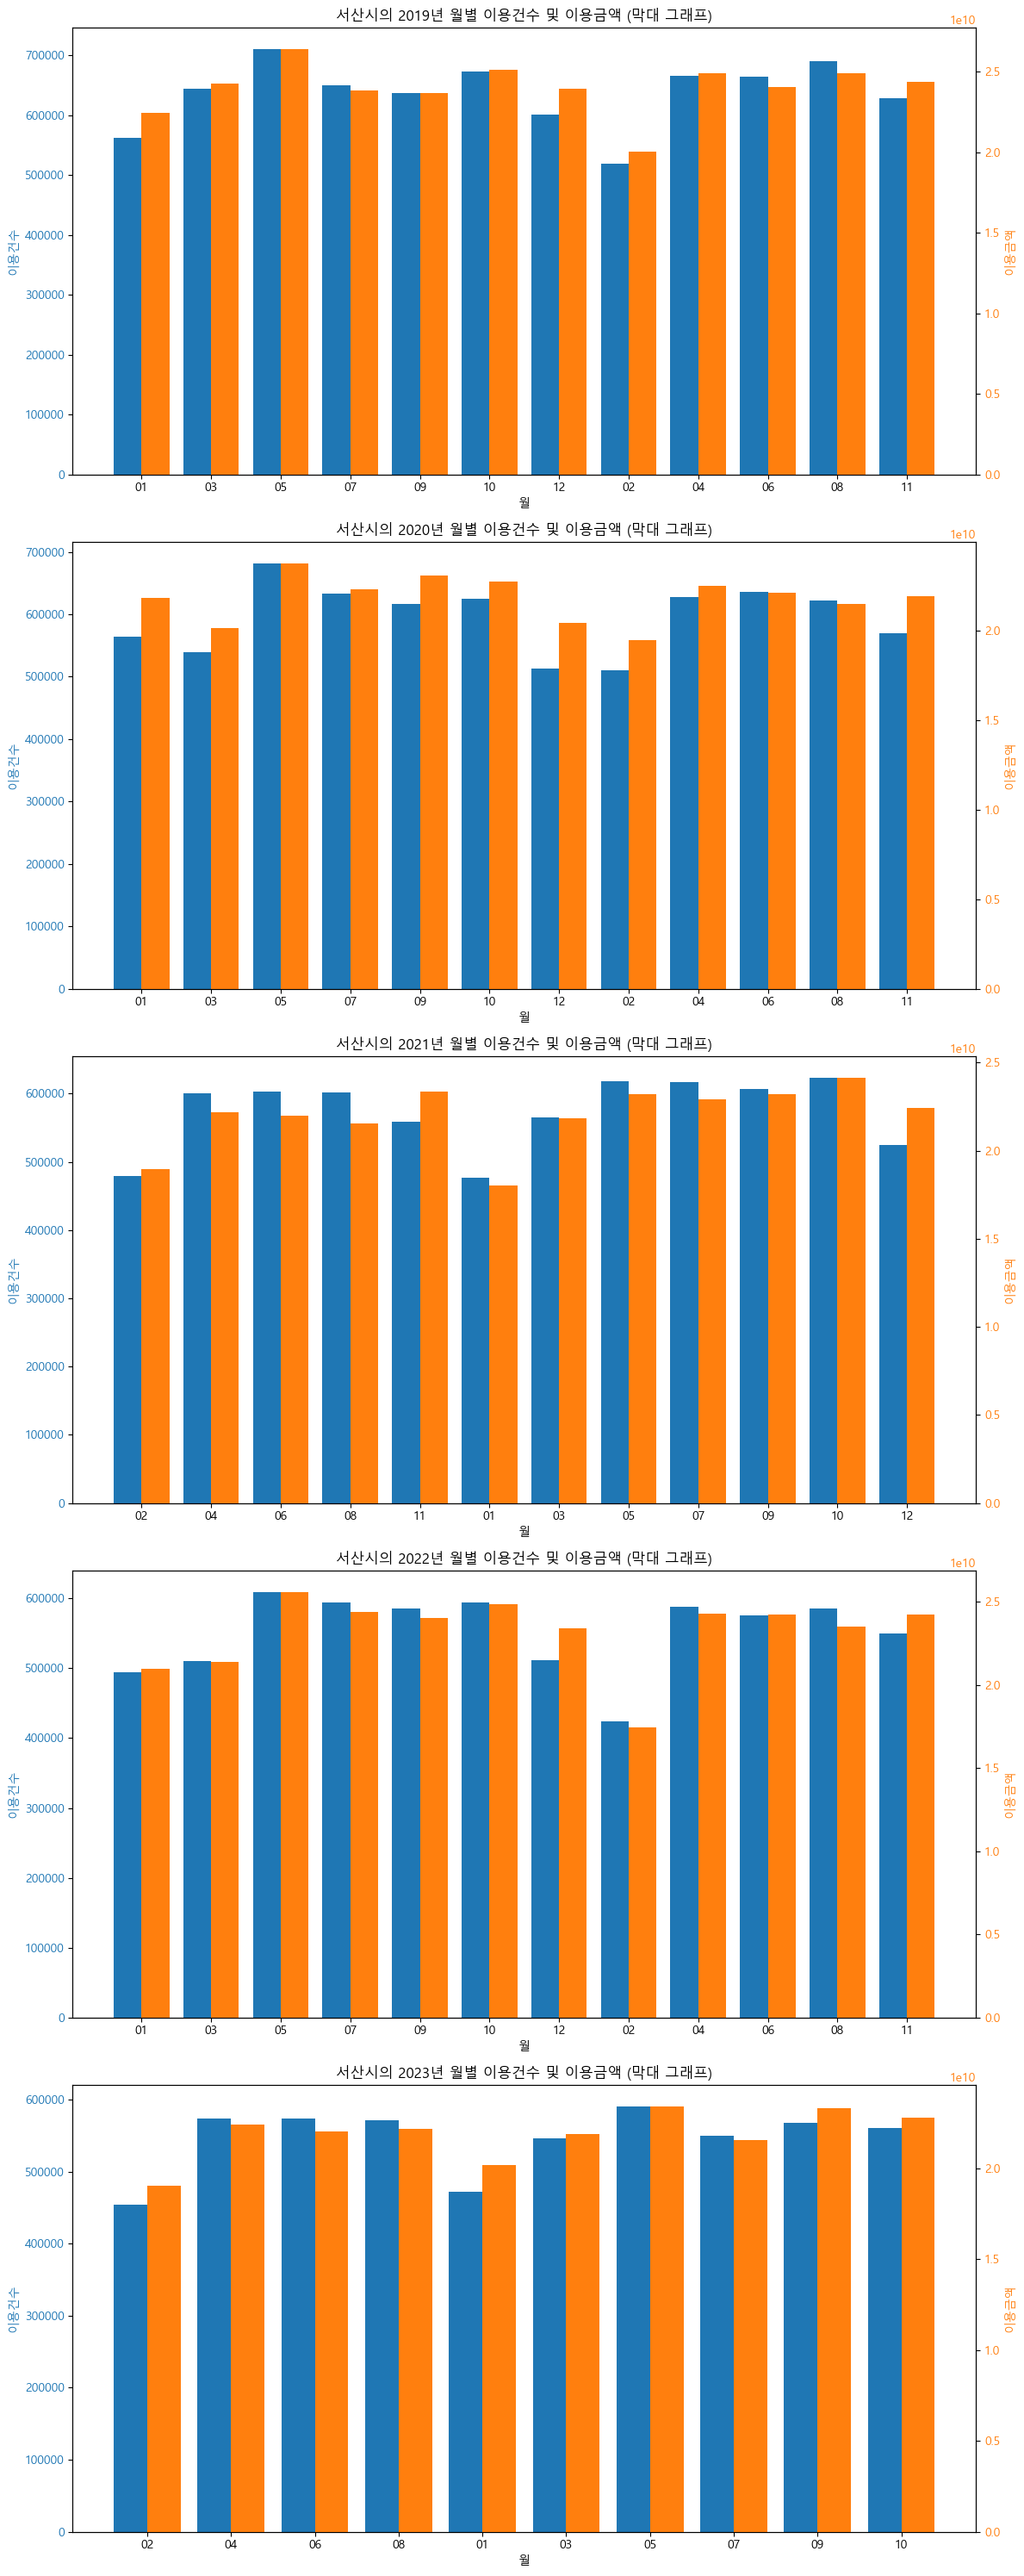

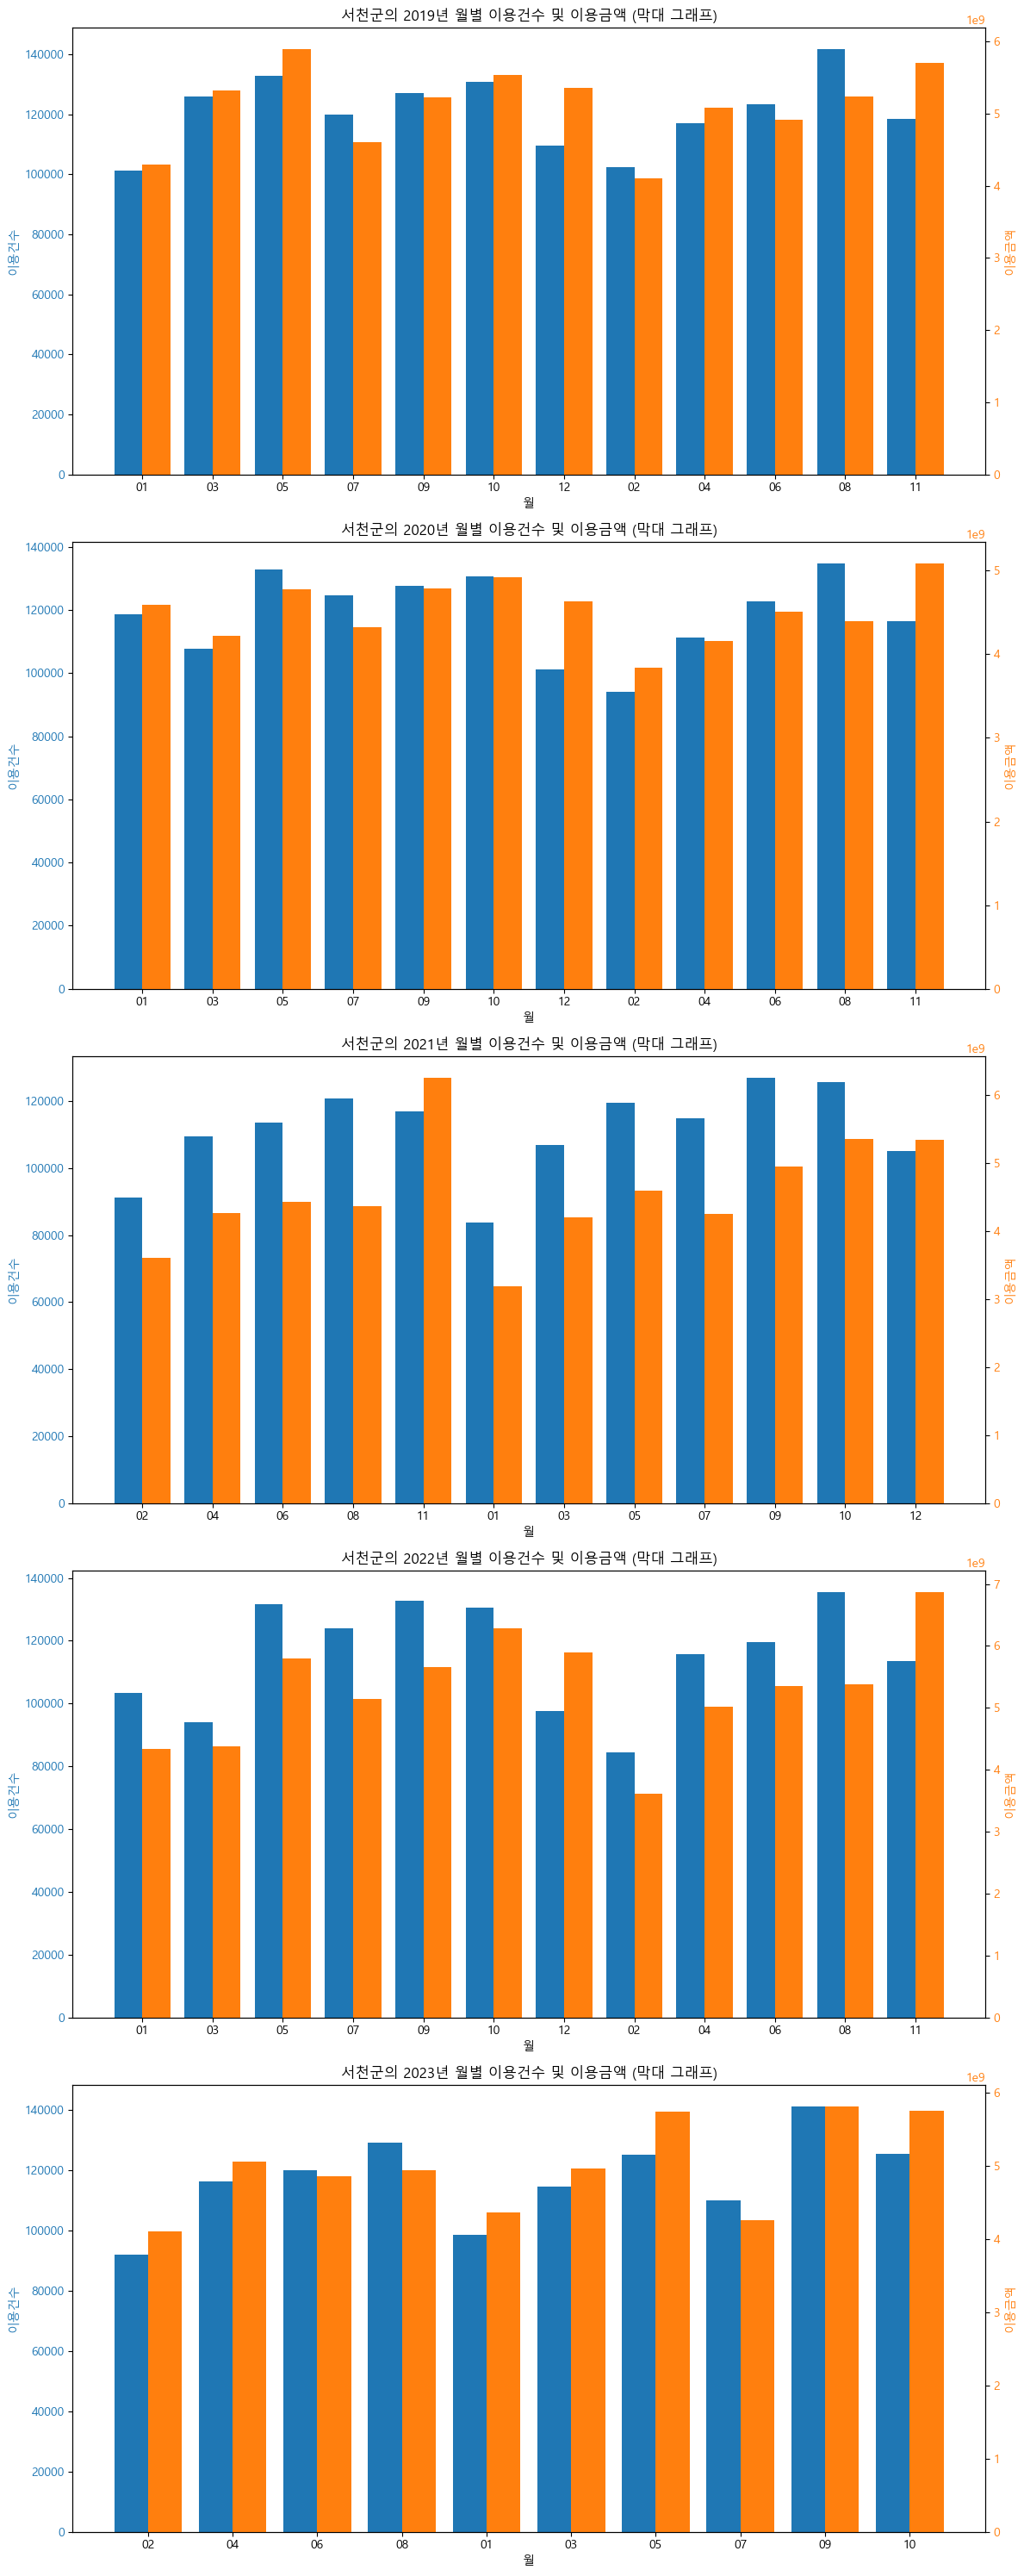

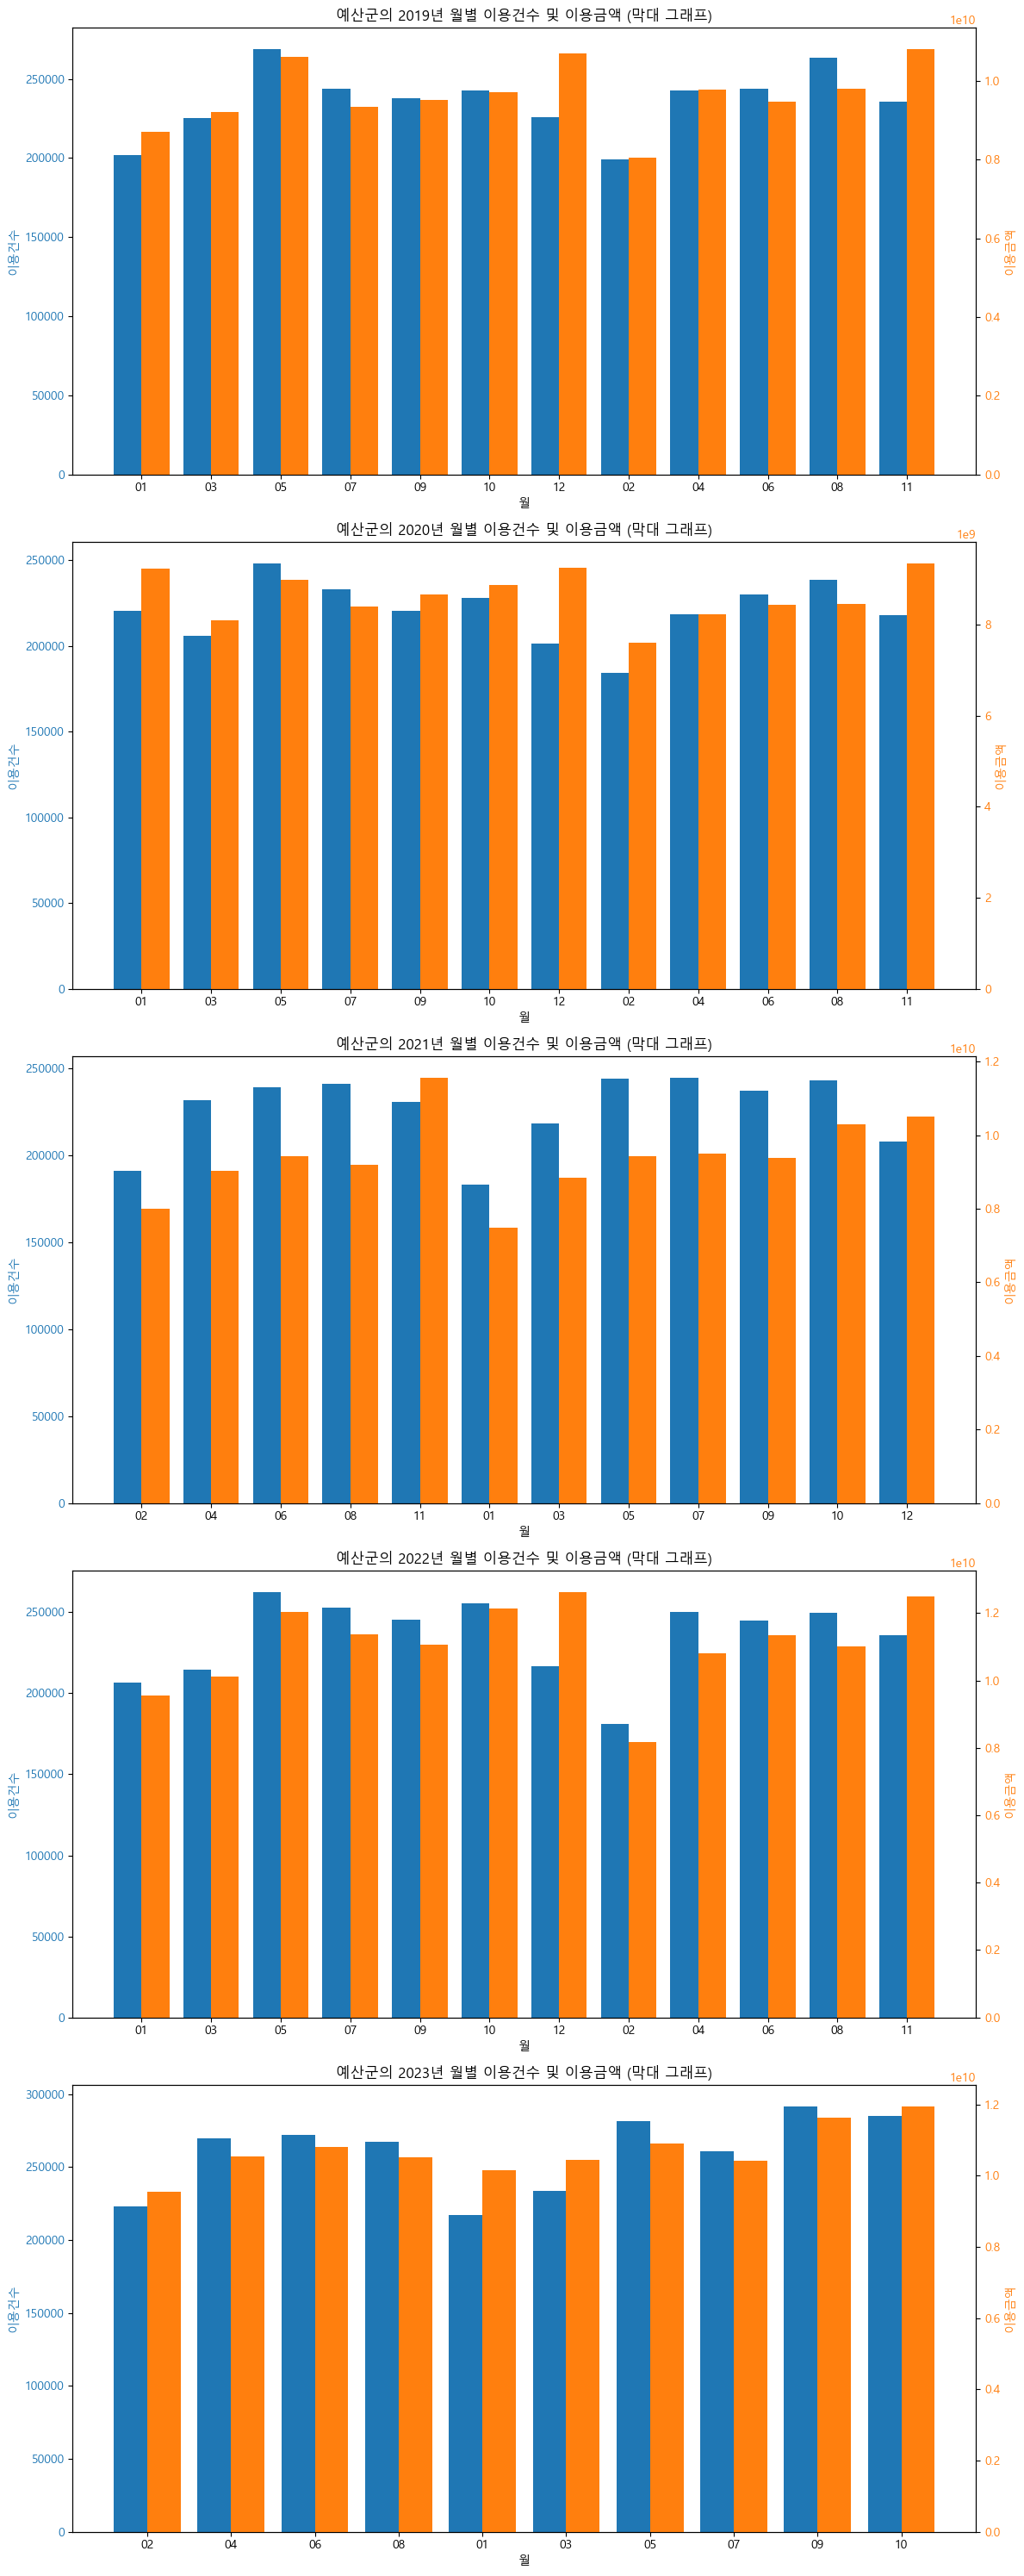

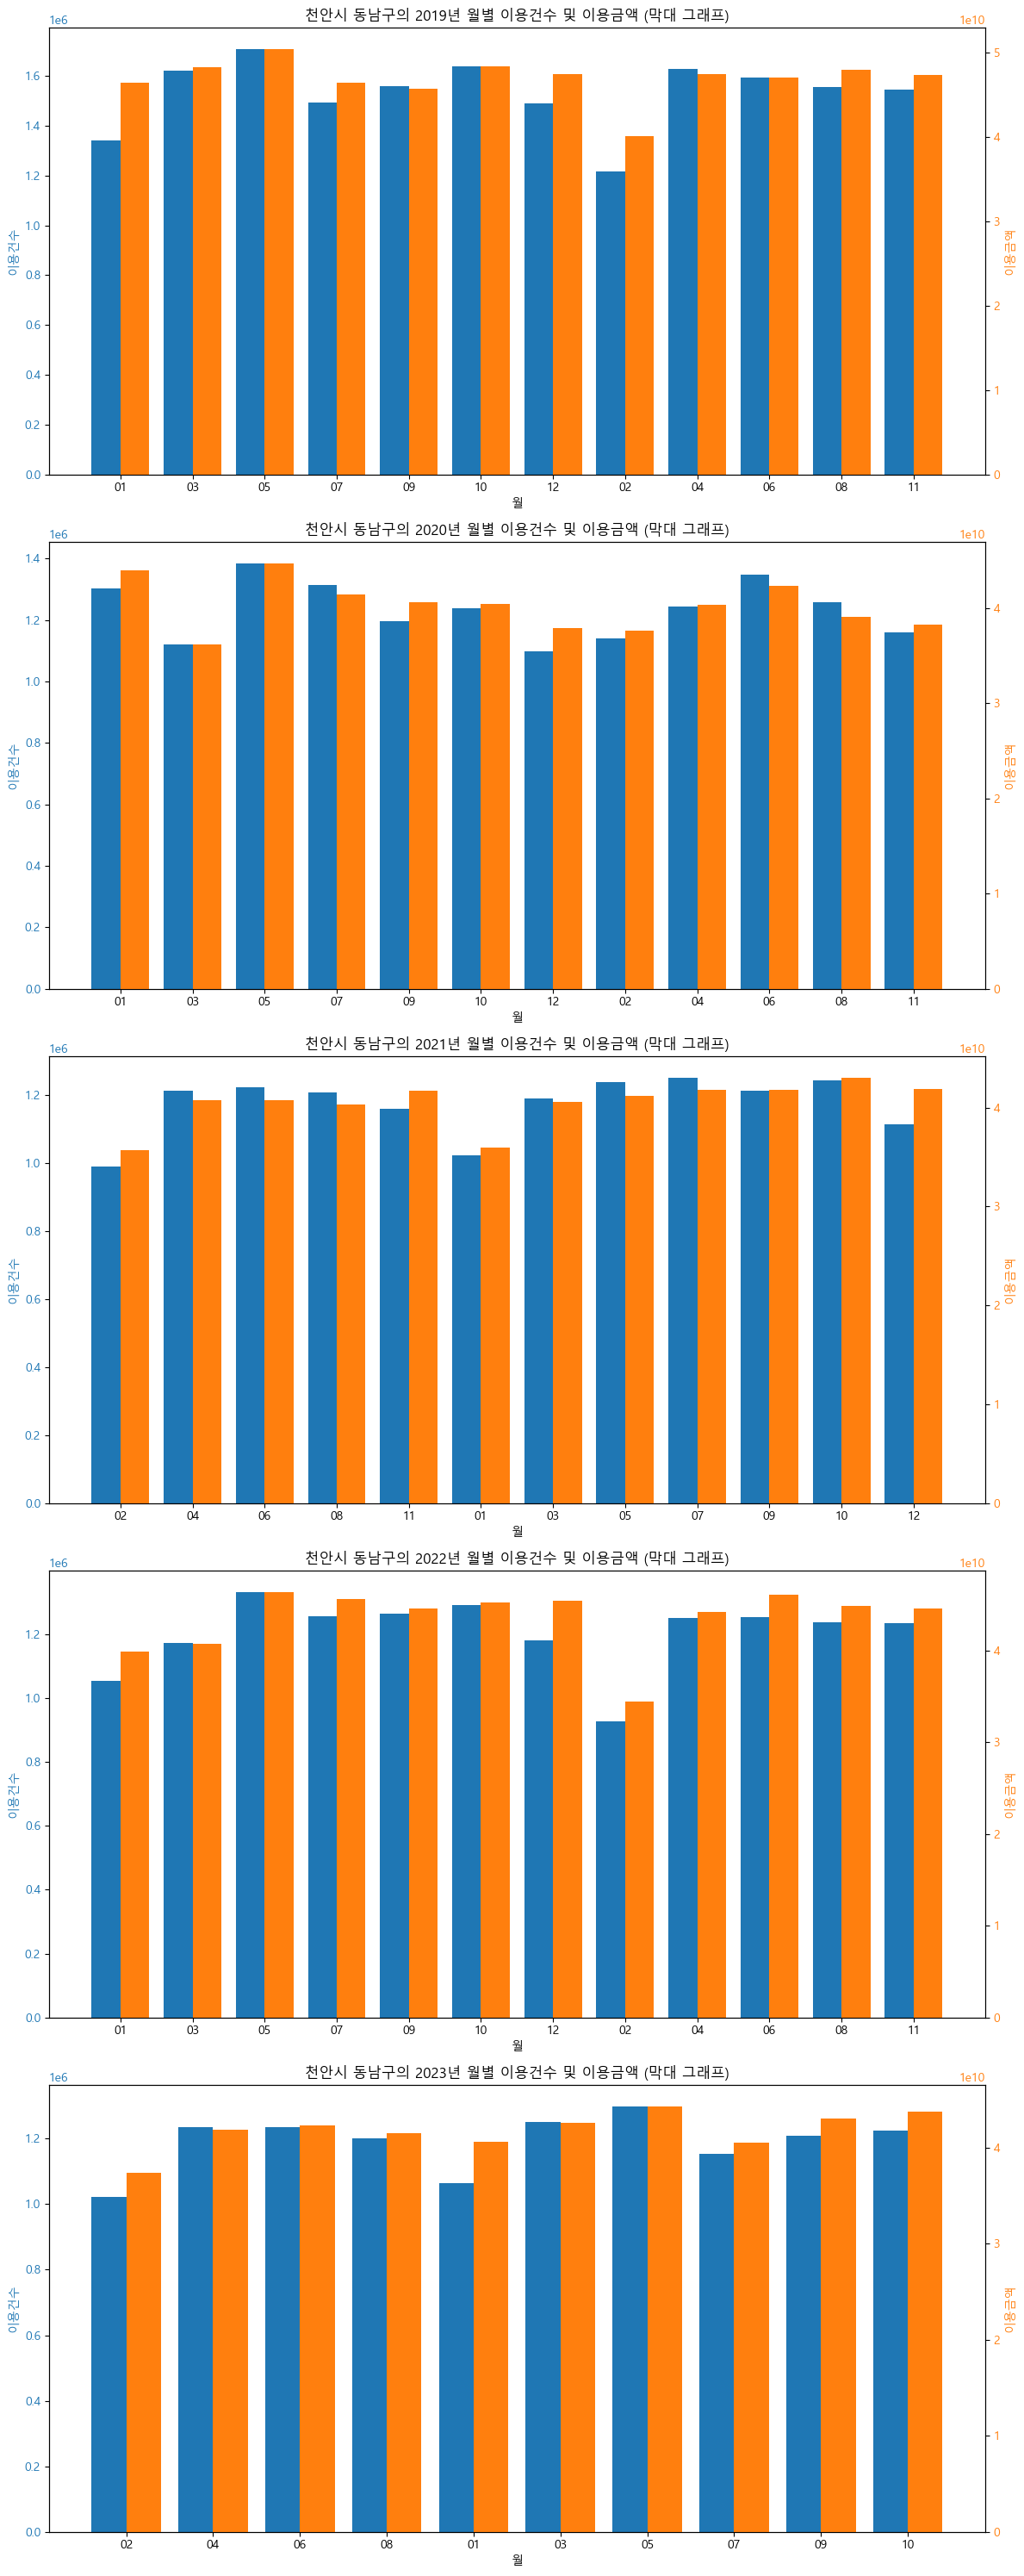

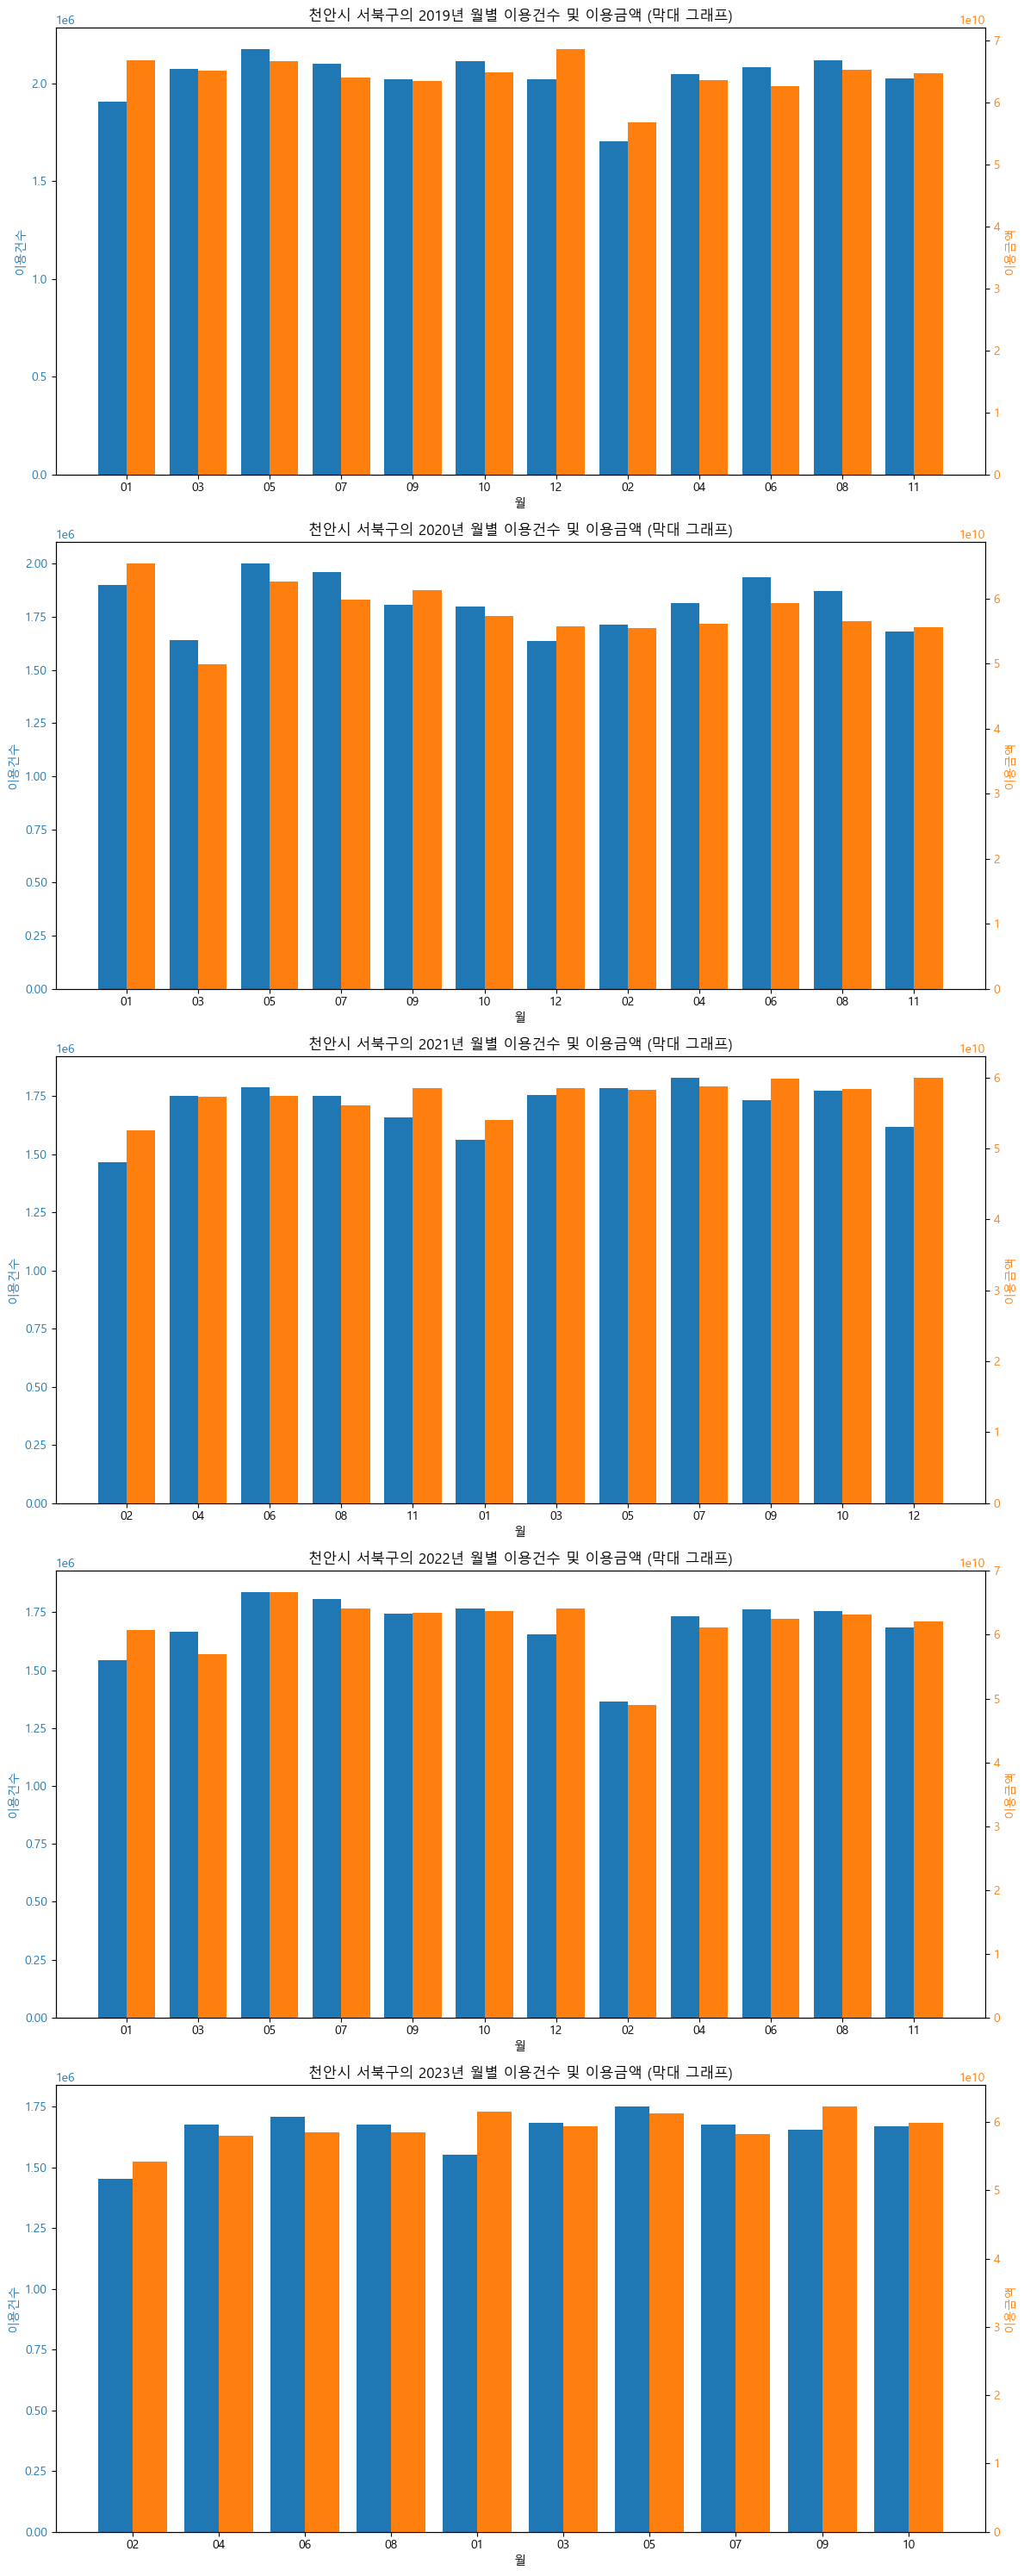

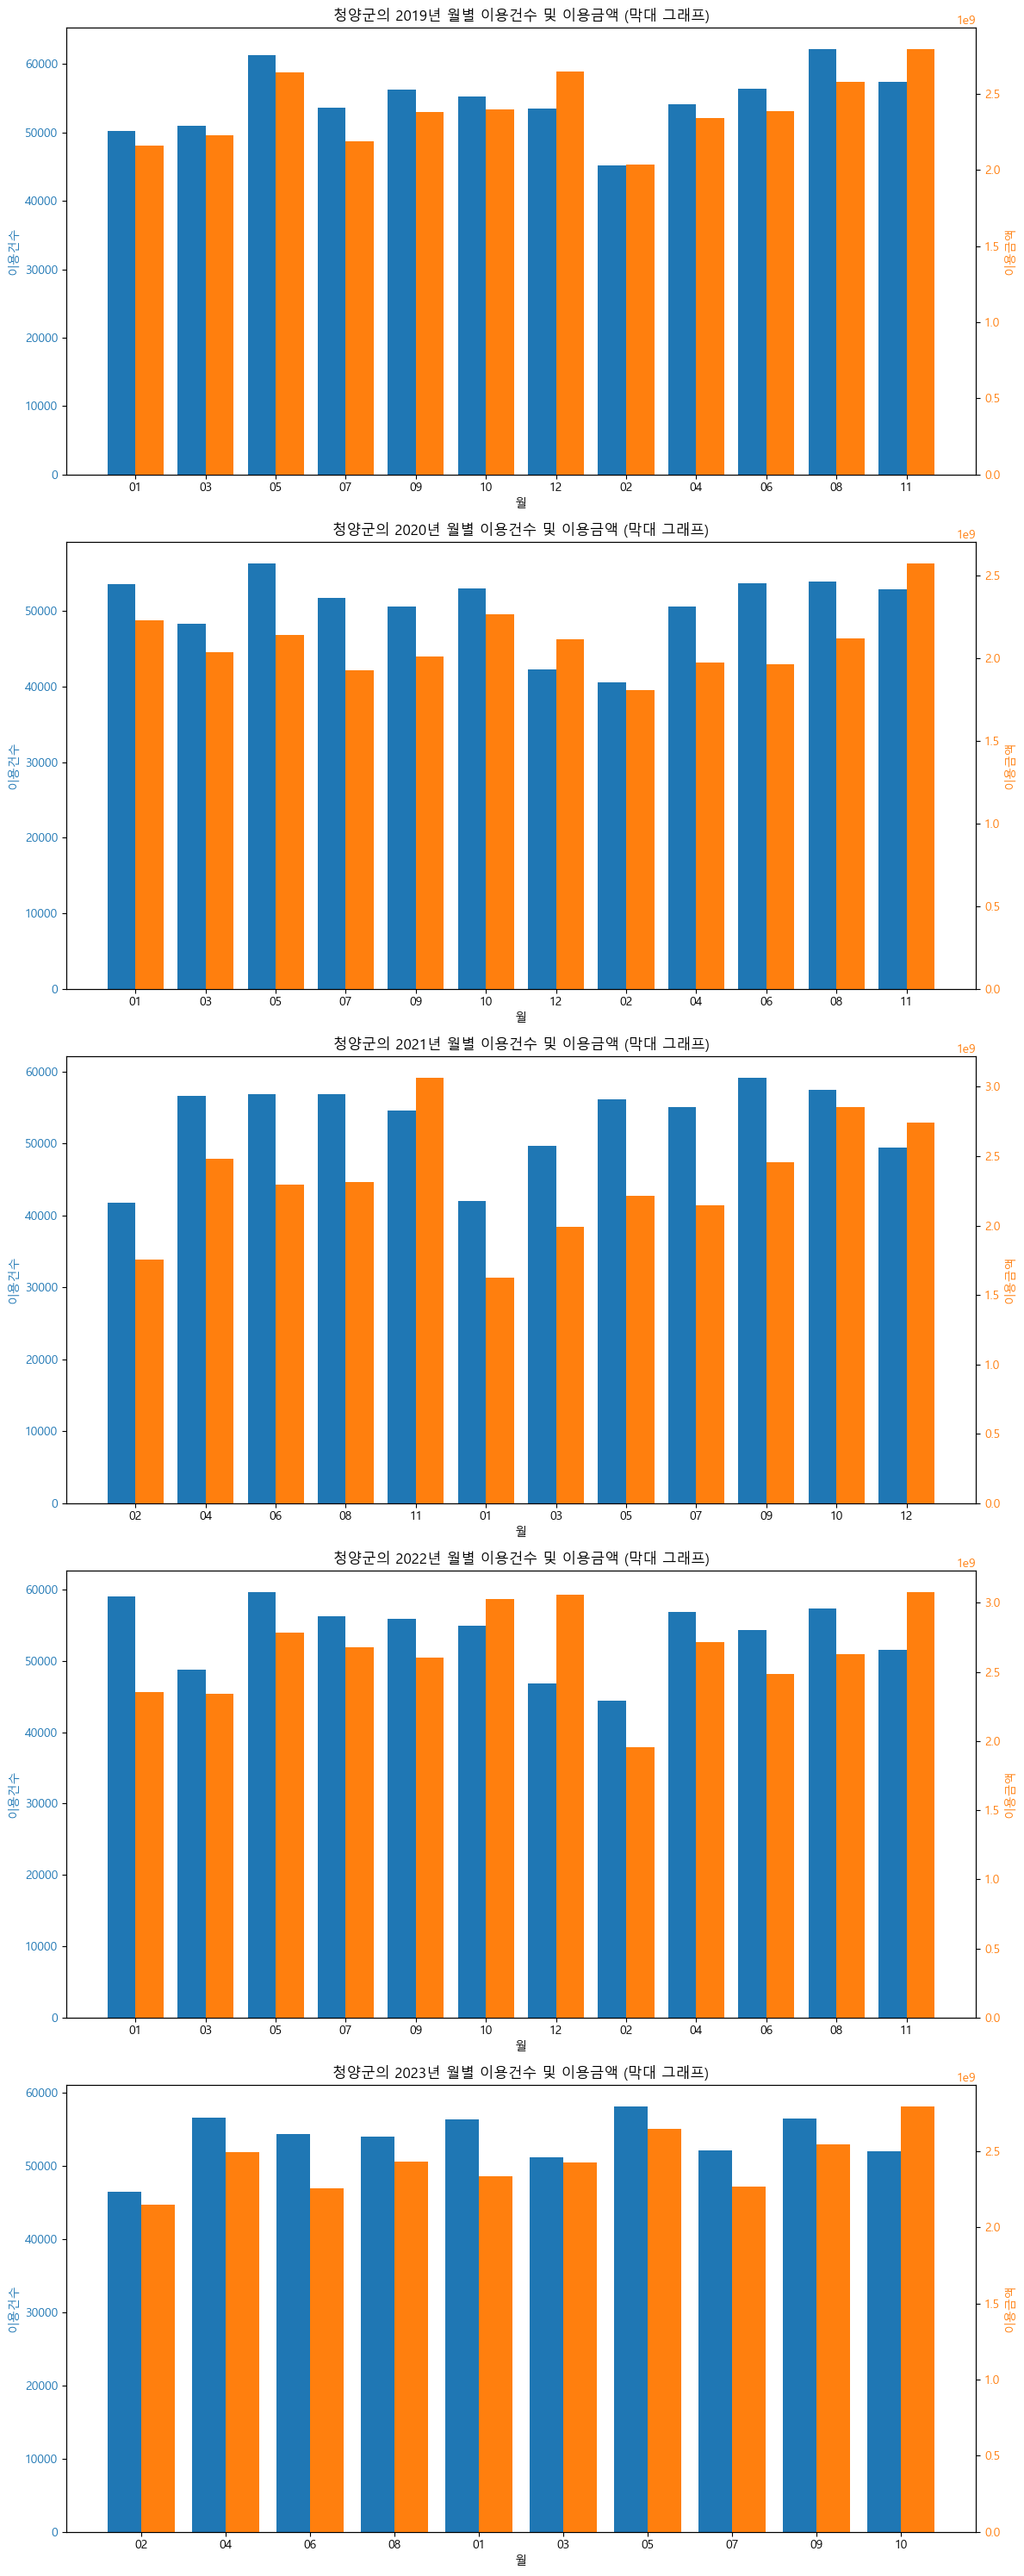

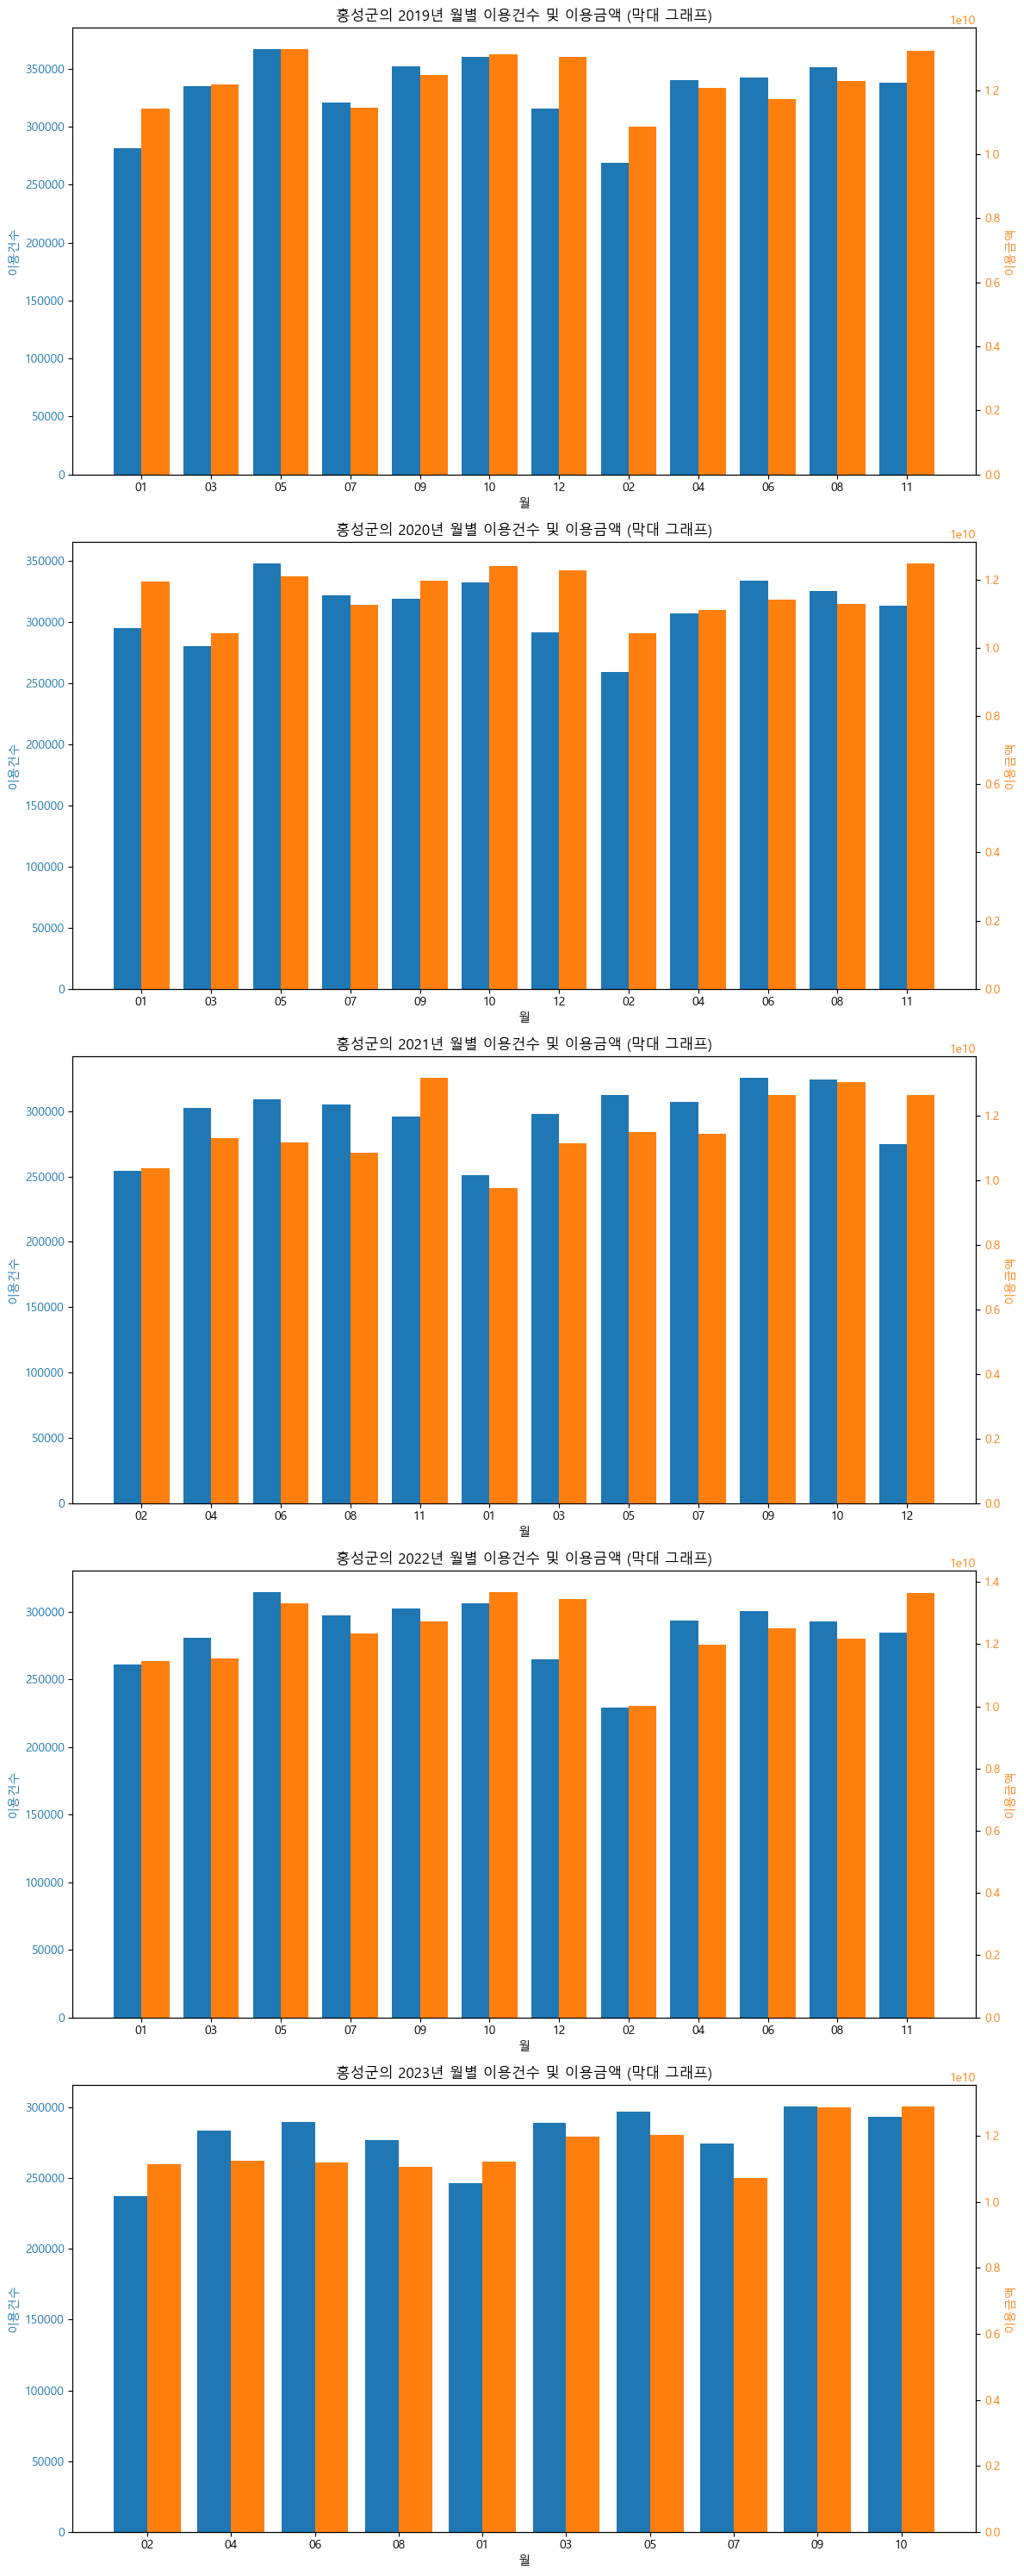

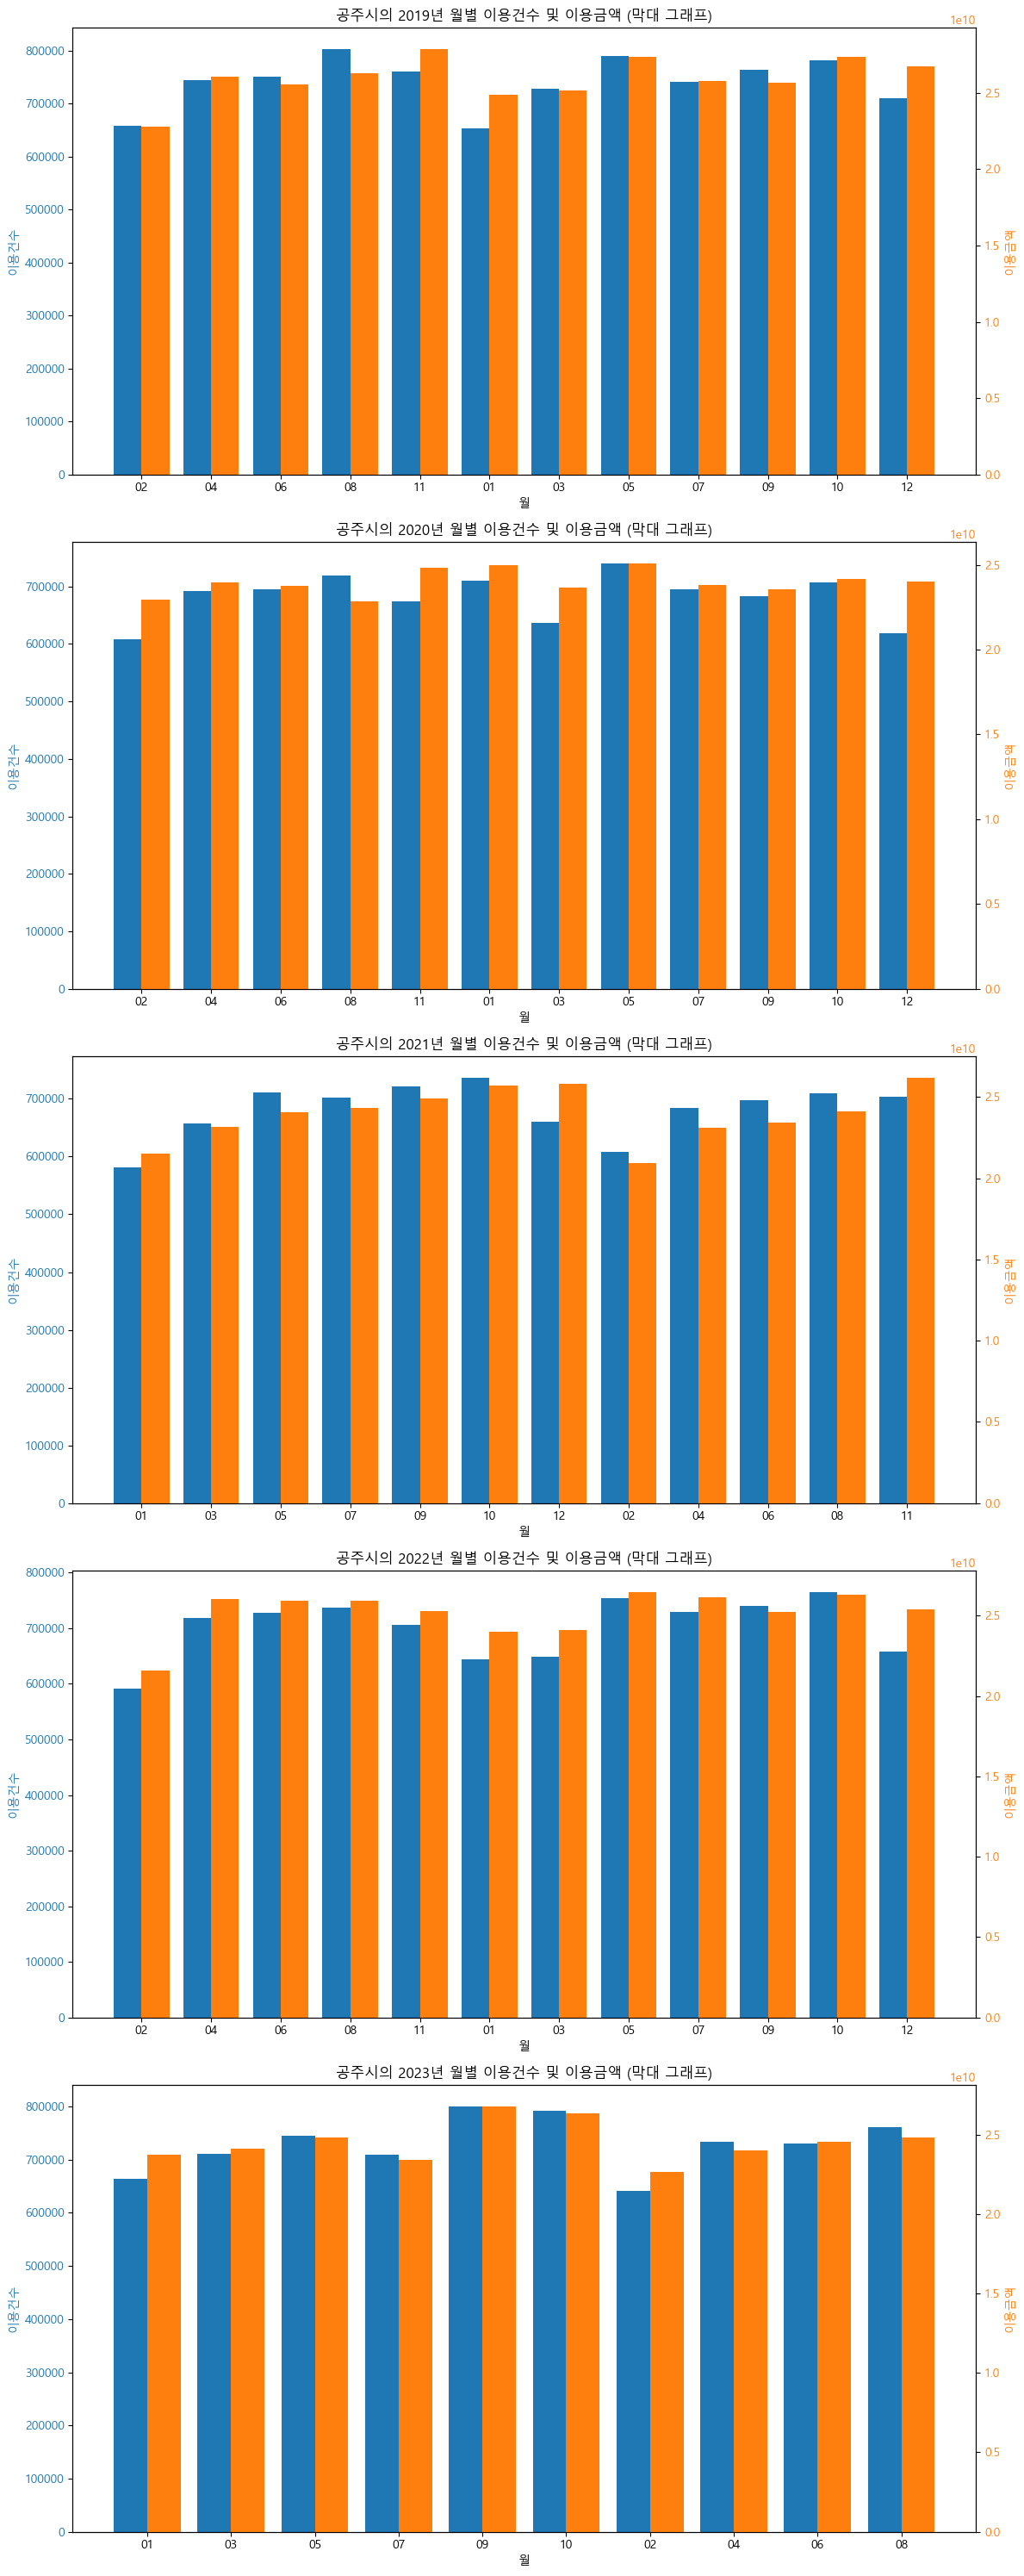

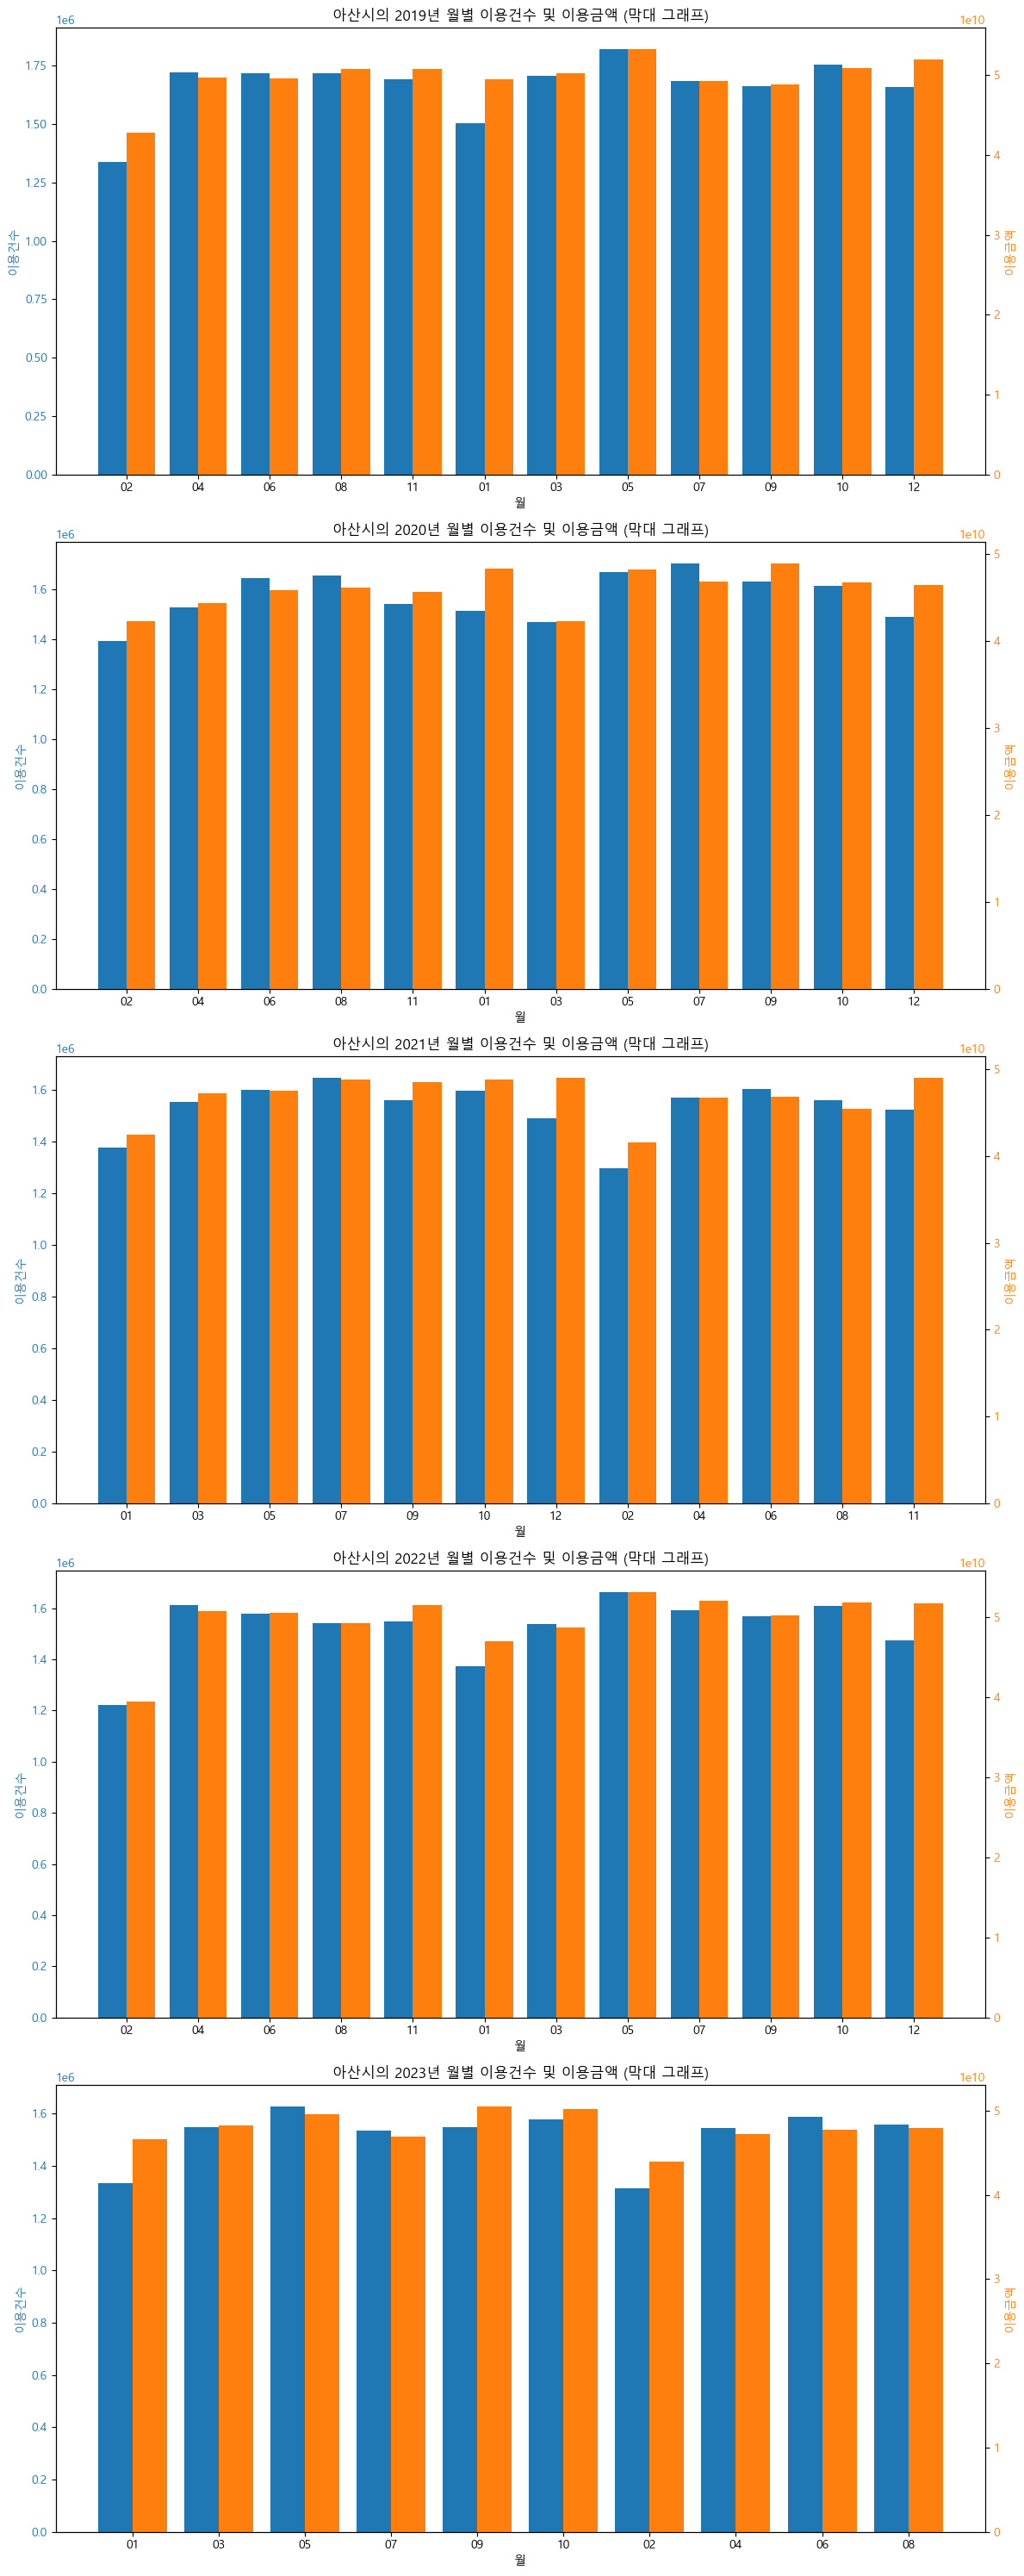

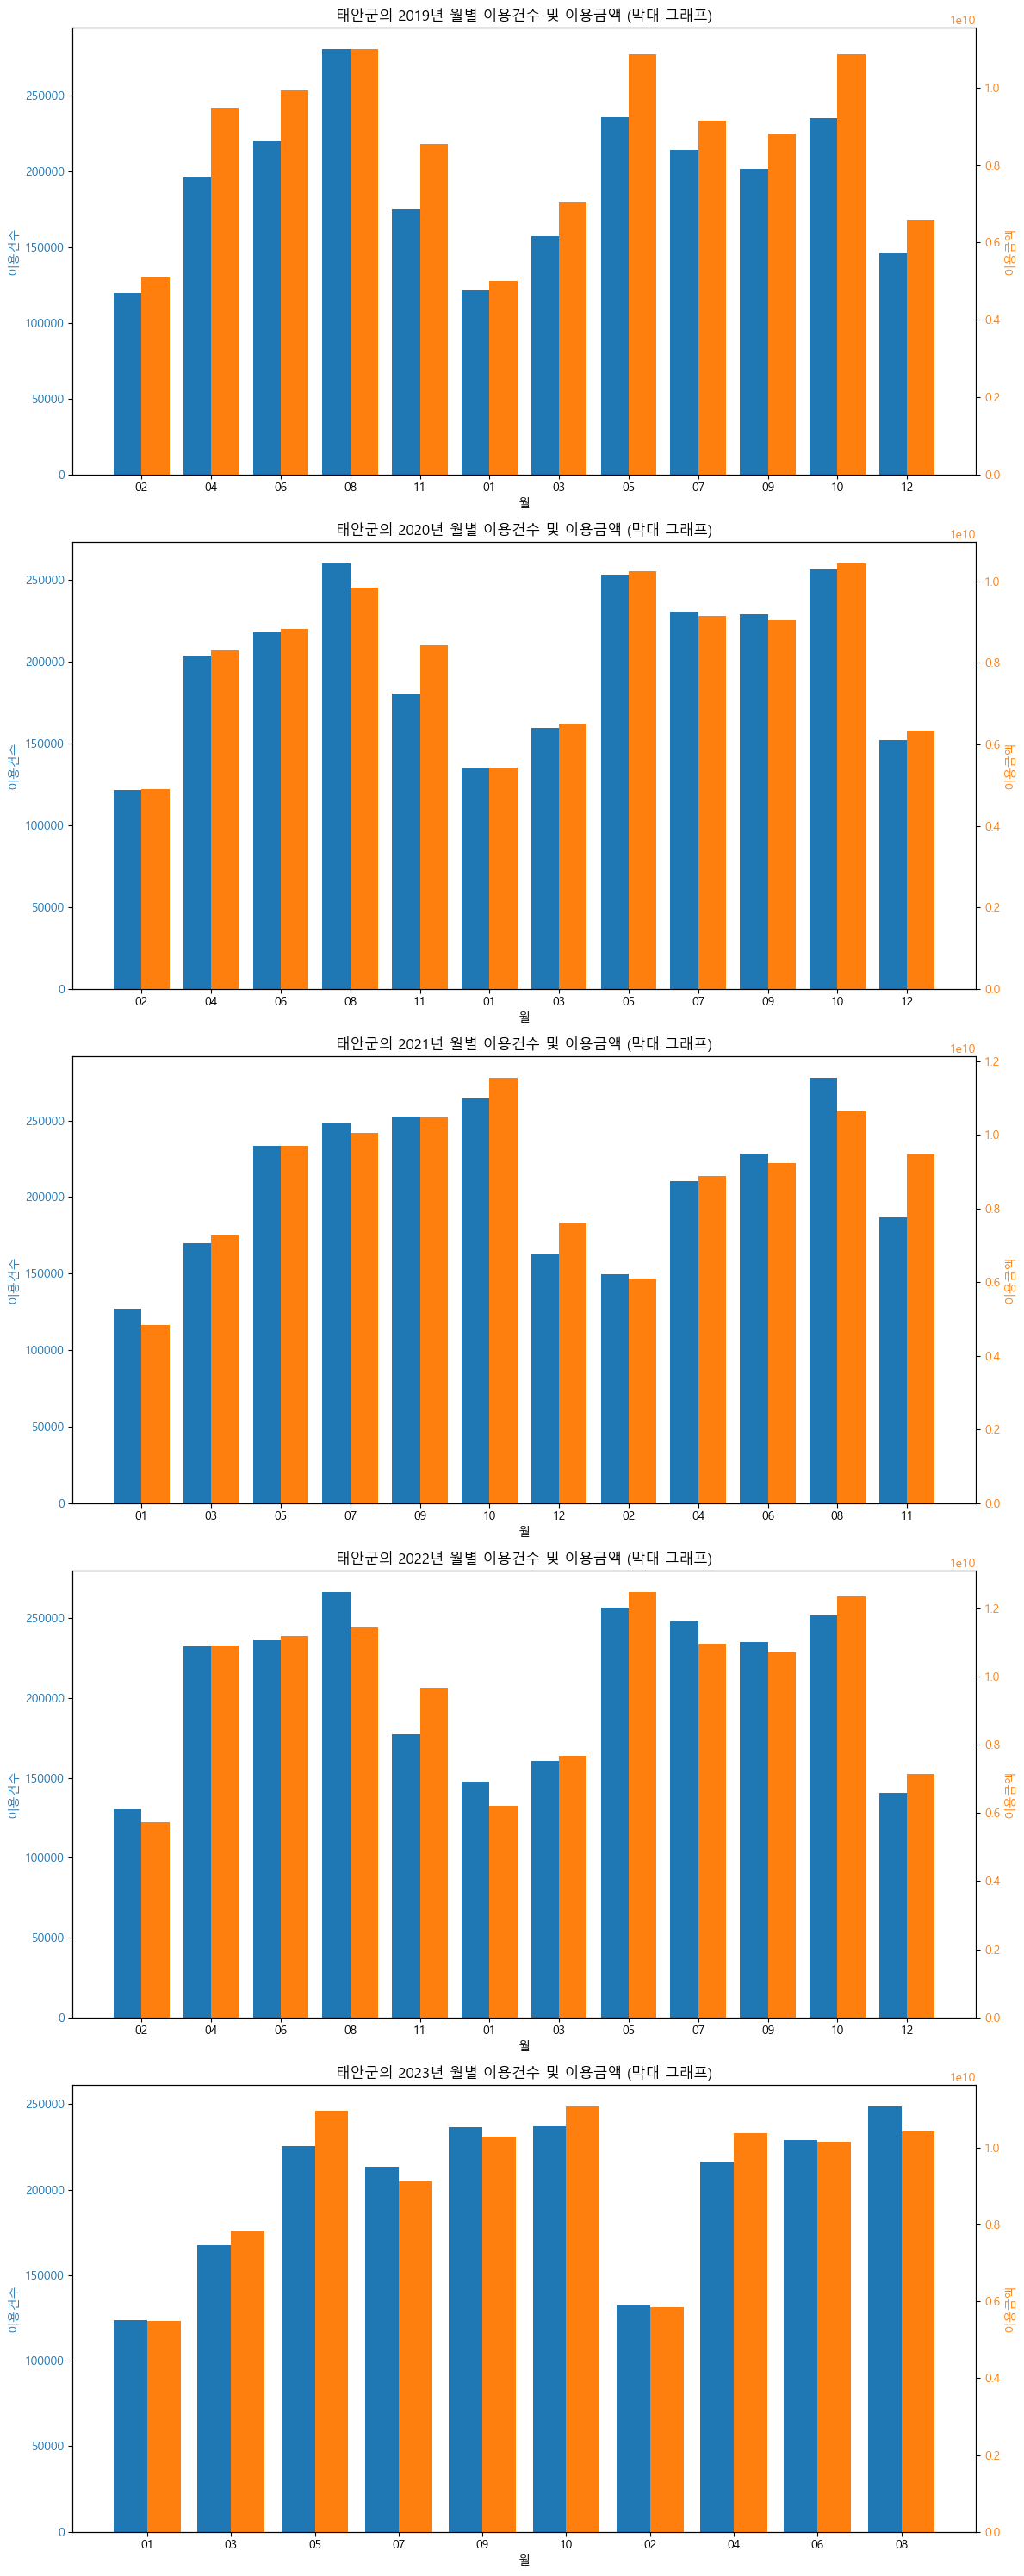

In [36]:
# '기준연월'을 문자열로 변환
df_card_4['기준연월'] = df_card_4['기준연월'].astype(str)

# '기준연월'에서 연도와 월을 추출
df_card_4['년도'] = df_card_4['기준연월'].str[:4]
df_card_4['월'] = df_card_4['기준연월'].str[4:6]

# 시군구명 리스트 추출
unique_regions = df_card_4['시군구명'].unique()

for region_name in unique_regions:
    df_region = df_card_4[df_card_4['시군구명'] == region_name]
    unique_years = df_region['년도'].unique()
    num_years = len(unique_years)

    # 전체 그래프 설정
    fig, axs = plt.subplots(num_years, 1, figsize=(12, num_years * 6))

    for i, year in enumerate(unique_years):
        df_year = df_region[df_region['년도'] == year]

        # x축 설정 (월별 데이터)
        x = np.arange(len(df_year['월']))

        # 첫 번째 y축 (이용건수) 막대 그래프
        color = 'tab:blue'
        axs[i].set_xlabel('월')
        axs[i].set_ylabel('이용건수', color=color)
        bars1 = axs[i].bar(x - 0.2, df_year['이용건수'], width=0.4, color=color, label='이용건수')
        axs[i].tick_params(axis='y', labelcolor=color)

        # 두 번째 y축 (이용금액) 막대 그래프
        ax2 = axs[i].twinx()
        color = 'tab:orange'
        ax2.set_ylabel('이용금액', color=color)
        bars2 = ax2.bar(x + 0.2, df_year['이용금액'], width=0.4, color=color, label='이용금액')
        ax2.tick_params(axis='y', labelcolor=color)

        # x축 레이블 설정
        axs[i].set_xticks(x)
        axs[i].set_xticklabels(df_year['월'])

        # 그래프 제목 및 레이아웃 설정
        axs[i].set_title(f'{region_name}의 {year}년 월별 이용건수 및 이용금액 (막대 그래프)')

    fig.tight_layout()
    plt.show()

In [37]:
df_pet_registration = pd.read_csv(f"{DATA_PATH}/한국문화정보원_전국 반려동물 동반 가능 문화시설 위치 데이터_20221130.CSV", encoding = 'cp949')

In [38]:
df_pet_registration

시설명  카테고리1     카테고리2   카테고리3  시도 명칭   시군구 명칭 법정읍면동명칭 리 명칭  \
0         1004 약국  반려동물업      반려의료    동물약국    경기도  고양시 덕양구     동산동  NaN   
1      1004섬수석미술관  반려동물업    반려동반여행     미술관   전라남도      신안군     자은면  백산리   
2        100세건강약국  반려동물업      반려의료    동물약국    경기도  안양시 만안구     안양동  NaN   
3          100세약국  반려동물업      반려의료    동물약국  서울특별시     영등포구    당산2동  NaN   
4          100세약국  반려동물업      반려의료    동물약국    경기도  수원시 팔달구     인계동  NaN   
...           ...    ...       ...     ...    ...      ...     ...  ...   
23924       y동물병원  반려동물업      반려의료    동물병원  대구광역시      수성구     시지동  NaN   
23925     YOLO오시개  반려동물업  반려동물식당카페      카페  부산광역시      사상구     주례동  NaN   
23926        YS유통  반려동물업  반려동물 서비스  반려동물용품    경기도      파주시     조리읍  장곡리   
23927     ZOO동물병원  반려동물업      반려의료    동물병원  서울특별시      성북구     정릉동  NaN   
23928     ZOO동물병원  반려동물업      반려의료    동물병원  울산광역시       남구     삼산동  NaN   

              번지     도로명 이름  ... 입장(이용료)가격 정보  반려동물 동반 가능정보  반려동물 전용 정보  \
0       352-1 번지        동세로  ...           변동          동반가능        해당없음   
1      633-54 번지     자은서부2길  ...           없음          동반불가        해당없음   
2       856-4 번지        안양로  ...           변동          동반가능        해당없음   
3       217-4 번지        양평로  ...           변동          동반가능        해당없음   
4       942-4 번지       경수대로  ...           변동          동반가능        해당없음   
...          ...        ...  ...          ...           ...         ...   
23924  258-14 번지      달구벌대로  ...           변동          동반가능        해당없음   
23925   60-55 번지  가야대로366번길  ...       10000원          동반가능        해당없음   
23926    73-3 번지        장곡로  ...           없음          동반가능        해당없음   
23927  16-162 번지        정릉로  ...           변동          동반가능        해당없음   
23928  180-33 번지        돋질로  ...           변동          동반가능        해당없음   

       입장 가능 동물 크기 반려동물 제한사항 장소(실내) 여부 장소(실외)여부                기본 정보_장소설명  \
0            모두 가능   제한사항 없음   실내 동반가능  실외 동반불가                      동물약국   
1             해당없음      해당없음   실내 동반가능  실외 동반가능                       미술관   
2            모두 가능   제한사항 없음   실내 동반가능  실외 동반불가                      동물약국   
3            모두 가능   제한사항 없음   실내 동반가능  실외 동반불가                      동물약국   
4            모두 가능   제한사항 없음   실내 동반가능  실외 동반불가                      동물약국   
...            ...       ...       ...      ...                       ...   
23924        모두 가능   제한사항 없음   실내 동반가능  실외 동반불가    일반동물병원, 일요일 야간 예약진료 가능   
23925        모두 가능   제한사항 없음   실내 동반가능  실외 동반가능                  애견카페, 호텔   
23926        모두 가능   제한사항 없음   실내 동반가능  실외 동반불가  온라인쇼핑몰, 강아지용품, 반려동물 원목가구   
23927        모두 가능   제한사항 없음   실내 동반가능  실외 동반불가                    일반동물병원   
23928        모두 가능   제한사항 없음   실내 동반가능  실외 동반불가                    일반동물병원   

        애견 동반 추가 요금       최종작성일  
0                없음  2022-11-30  
1                없음  2022-11-30  
2                없음  2022-11-30  
3                없음  2022-11-30  
4                없음  2022-11-30  
...             ...         ...  
23924            없음  2022-11-30  
23925  2,000~6,000원  2022-11-30  
23926            없음  2022-11-30  
23927            없음  2022-11-30  
23928            없음  2022-11-30  

[23929 rows x 31 columns]